In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os 
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Plan

# Data Import : 

In [2]:
cd ../data

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/data


Data import

In [3]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
train_a = pd.read_parquet('A/train_targets.parquet')

X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')

X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

Set new index, and delete the old one.

In [4]:
X_train_estimated_a.set_index('date_forecast', inplace = True)
X_train_observed_a.set_index('date_forecast', inplace = True)
X_test_estimated_a.set_index('date_forecast', inplace = True)

X_train_estimated_b.set_index('date_forecast', inplace = True)
X_train_observed_b.set_index('date_forecast', inplace = True)
X_test_estimated_b.set_index('date_forecast', inplace = True)

X_train_estimated_c.set_index('date_forecast', inplace = True)
X_train_observed_c.set_index('date_forecast', inplace = True)
X_test_estimated_c.set_index('date_forecast', inplace = True)


X_train_estimated_a.drop('date_calc', axis=1, inplace=True)
X_test_estimated_a.drop('date_calc', axis=1, inplace=True)

X_train_estimated_b.drop('date_calc', axis=1, inplace=True)
X_test_estimated_b.drop('date_calc', axis=1, inplace=True)

X_train_estimated_c.drop('date_calc', axis=1, inplace=True)
X_test_estimated_c.drop('date_calc', axis=1, inplace=True)


train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

train_a.dropna(inplace = True)
train_b.dropna(inplace = True)
train_c.dropna(inplace = True)

Match the size of X and Y. We create X_train_estimated_S_matched, X_train_observed_S_matched, train_S_estimated_matched, train_S_observed_matched

In [5]:
feature_idx = ['dew_or_rime:idx','is_day:idx','is_in_shadow:idx','precip_type_5min:idx','snow_drift:idx']
for feature in feature_idx:
    X_train_observed_a[feature] = X_train_observed_a[feature].resample('H').mean().round()
    X_train_observed_b[feature] = X_train_observed_b[feature].resample('H').mean().round()
    X_train_observed_c[feature] = X_train_observed_c[feature].resample('H').mean().round()

    X_train_estimated_a[feature] = X_train_estimated_a[feature].resample('H').mean().round()
    X_train_estimated_b[feature] = X_train_estimated_b[feature].resample('H').mean().round()
    X_train_estimated_c[feature] = X_train_estimated_c[feature].resample('H').mean().round()

    X_test_estimated_a[feature] = X_test_estimated_a[feature].resample('H').mean().round()
    X_test_estimated_b[feature] = X_test_estimated_b[feature].resample('H').mean().round()
    X_test_estimated_c[feature] = X_test_estimated_c[feature].resample('H').mean().round()

In [6]:
features_no_idx = X_train_observed_a.columns[X_train_observed_a.columns.isin(feature_idx)==False].tolist()
for feature in features_no_idx:
    X_train_observed_a[feature] = X_train_observed_a[feature].resample('H').mean()
    X_train_observed_b[feature] = X_train_observed_b[feature].resample('H').mean()
    X_train_observed_c[feature] = X_train_observed_c[feature].resample('H').mean()

    X_train_estimated_a[feature] = X_train_estimated_a[feature].resample('H').mean()
    X_train_estimated_b[feature] = X_train_estimated_b[feature].resample('H').mean()
    X_train_estimated_c[feature] = X_train_estimated_c[feature].resample('H').mean()

    X_test_estimated_a[feature] = X_test_estimated_a[feature].resample('H').mean()
    X_test_estimated_b[feature] = X_test_estimated_b[feature].resample('H').mean()
    X_test_estimated_c[feature] = X_test_estimated_c[feature].resample('H').mean()

In [7]:
X_train_estimated_a = X_train_estimated_a.loc[X_train_estimated_a.index[::4]]
X_train_observed_a = X_train_observed_a.loc[X_train_observed_a.index[::4]]
X_test_estimated_a = X_test_estimated_a.loc[X_test_estimated_a.index[::4]]


X_train_estimated_b = X_train_estimated_b.loc[X_train_estimated_b.index[::4]]
X_train_observed_b = X_train_observed_b.loc[X_train_observed_b.index[::4]]
X_test_estimated_b = X_test_estimated_b.loc[X_test_estimated_b.index[::4]]

X_train_estimated_c = X_train_estimated_c.loc[X_train_estimated_c.index[::4]]
X_train_observed_c = X_train_observed_c.loc[X_train_observed_c.index[::4]]
X_test_estimated_c = X_test_estimated_c.loc[X_test_estimated_c.index[::4]]

intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)


X_train_estimated_a = X_train_estimated_a.loc[intersection_index_estimated_a]
X_train_estimated_b = X_train_estimated_b.loc[intersection_index_estimated_b]
X_train_estimated_c = X_train_estimated_c.loc[intersection_index_estimated_c]


X_train_observed_a = X_train_observed_a.loc[intersection_index_observed_a]
X_train_observed_b = X_train_observed_b.loc[intersection_index_observed_b]
X_train_observed_c = X_train_observed_c.loc[intersection_index_observed_c]


train_a_estimated = train_a.loc[intersection_index_estimated_a]
train_b_estimated = train_b.loc[intersection_index_estimated_b]
train_c_estimated = train_c.loc[intersection_index_estimated_c]

train_a_observed = train_a.loc[intersection_index_observed_a]
train_b_observed = train_b.loc[intersection_index_observed_b]
train_c_observed = train_c.loc[intersection_index_observed_c]

In [8]:
#We match the sizes of X and Y
#We keep the measurements from every hour only
intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)


X_train_estimated_a = X_train_estimated_a.loc[intersection_index_estimated_a]
X_train_estimated_b = X_train_estimated_b.loc[intersection_index_estimated_b]
X_train_estimated_c = X_train_estimated_c.loc[intersection_index_estimated_c]


X_train_observed_a = X_train_observed_a.loc[intersection_index_observed_a]
X_train_observed_b = X_train_observed_b.loc[intersection_index_observed_b]
X_train_observed_c = X_train_observed_c.loc[intersection_index_observed_c]


train_a_estimated = train_a.loc[intersection_index_estimated_a]
train_b_estimated = train_b.loc[intersection_index_estimated_b]
train_c_estimated = train_c.loc[intersection_index_estimated_c]

train_a_observed = train_a.loc[intersection_index_observed_a]
train_b_observed = train_b.loc[intersection_index_observed_b]
train_c_observed = train_c.loc[intersection_index_observed_c]

In [9]:
B19 = train_b.loc['2019-6-1':'2019-6-2'].index

b20_1 = train_b.loc['2020-4-2':'2020-4-15'].index
b20_2 = train_b.loc['2020-7-13':'2020-8-25'].index
B20 = b20_1.union(b20_2)

b21_1 = train_b.loc['2021-2-18':'2021-4-18'].index
b21_2 = train_b.loc['2021-4-30':'2021-5-1'].index
b21_3 = train_b.loc['2021-6-5':'2021-6-6'].index
b21_4 = train_b.loc['2021-6-13':'2021-6-13'].index
b21_5 = train_b.loc['2021-6-23':'2021-6-23'].index
b21_6 = train_b.loc['2021-7-4':'2021-7-5'].index
b21_7 = train_b.loc['2021-8-26':'2021-9-3'].index
b21_8 = train_b.loc['2021-9-10':'2021-9-13'].index
b21_9 = train_b.loc['2021-9-21':'2021-9-26'].index
B21 = b21_1.union(b21_2).union(b21_3).union(b21_4).union(b21_5).union(b21_6).union(b21_7).union(b21_8).union(b21_9)

B22 = train_b.loc['2022-3-20':'2022-4-4'].index

B_index_drop = B19.union(B20).union(B21).union(B22)

In [10]:
train_b = train_b[train_b.index.isin(B_index_drop)==False]

In [11]:
#We match the sizes of X and Y
#We keep the measurements from every hour only
new_index_b = train_b.index

intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)

X_train_estimated_b = X_train_estimated_b.loc[new_index_b.intersection(X_train_estimated_b.index)]
X_train_observed_b = X_train_observed_b.loc[new_index_b.intersection(X_train_observed_b.index)]

train_b_estimated = train_b.loc[X_train_estimated_b.index]
train_b_observed = train_b.loc[X_train_observed_b.index]

In [39]:
train_a_observed.shape

(29667, 1)

In [40]:
X_train_observed_a.shape

(29667, 45)

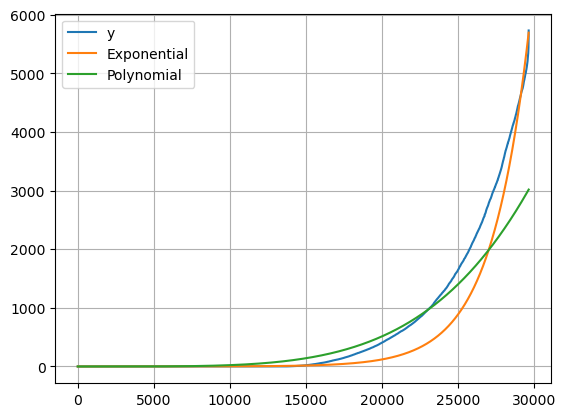

In [55]:
x = np.array(list(range(len(train_a_observed))))
plt.plot(x, train_a_observed.sort_values(by='pv_measurement'), label='y')
plt.plot(x, np.exp(x/2500)/25, label='Exponential')
plt.plot(x, (x/5000)**4.5, label='Polynomial')
plt.legend(loc="upper left")
plt.grid()
plt.show()

# 2. Feature Engineering:
- Create new features (time related, Fourier ?)
- Feature = stationary + seasonality + noise

In [41]:
# and more 

In [42]:
#We change the Time that is a string, to a variable in seconds 
timestamp_s_observed_a = X_train_observed_a.index.map(pd.Timestamp.timestamp)
timestamp_s_observed_b = X_train_observed_b.index.map(pd.Timestamp.timestamp)
timestamp_s_observed_c = X_train_observed_c.index.map(pd.Timestamp.timestamp)

timestamp_s_estimated_a = X_train_estimated_a.index.map(pd.Timestamp.timestamp)
timestamp_s_estimated_b = X_train_estimated_b.index.map(pd.Timestamp.timestamp)
timestamp_s_estimated_c = X_train_estimated_c.index.map(pd.Timestamp.timestamp)

timestamp_s_test_a = X_test_estimated_a.index.map(pd.Timestamp.timestamp)
timestamp_s_test_b = X_test_estimated_b.index.map(pd.Timestamp.timestamp)
timestamp_s_test_c = X_test_estimated_c.index.map(pd.Timestamp.timestamp)

#Then, we incorporate the periodicity
day = 24*60*60
year = (365.2425)*day

X_train_observed_a['Day sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Day cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Year sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / year))
X_train_observed_a['Year cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / year))

X_train_observed_b['Day sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Day cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Year sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / year))
X_train_observed_b['Year cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / year))

X_train_observed_c['Day sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Day cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Year sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / year))
X_train_observed_c['Year cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / year))


X_train_estimated_a['Day sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Day cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Year sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / year))
X_train_estimated_a['Year cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / year))

X_train_estimated_b['Day sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Day cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Year sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / year))
X_train_estimated_b['Year cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / year))

X_train_estimated_c['Day sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Day cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Year sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / year))
X_train_estimated_c['Year cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / year))


X_test_estimated_a['Day sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Day cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Year sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / year))
X_test_estimated_a['Year cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / year))

X_test_estimated_b['Day sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Day cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Year sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / year))
X_test_estimated_b['Year cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / year))

X_test_estimated_c['Day sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Day cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Year sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / year))
X_test_estimated_c['Year cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / year))


In [43]:
X_train_observed_a = pd.concat([X_train_observed_a, train_a_observed], axis = 1)
X_train_estimated_a = pd.concat([X_train_estimated_a, train_a_estimated], axis = 1)

X_train_observed_b = pd.concat([X_train_observed_b, train_b_observed], axis = 1)
X_train_estimated_b = pd.concat([X_train_estimated_b, train_b_estimated], axis = 1)

X_train_observed_c = pd.concat([X_train_observed_c, train_c_observed], axis = 1)
X_train_estimated_c = pd.concat([X_train_estimated_c, train_c_estimated], axis = 1)

In [44]:
X_train_a = pd.concat([X_train_observed_a, X_train_estimated_a], axis = 0)
X_train_b = pd.concat([X_train_observed_b, X_train_estimated_b], axis = 0)
X_train_c = pd.concat([X_train_observed_c, X_train_estimated_c], axis = 0)

In [52]:
X_train_b.drop(X_train_b[(X_train_b['sun_elevation:d']< -5) & (X_train_b['pv_measurement'] >5)].index, inplace=True)

In [185]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
no = pd.DataFrame(qt.fit_transform(train_a_observed), 
                  index=train_a_observed.index, 
                  columns=train_a_observed.columns)

# SKFORECAST

In [178]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# Modelling and Forecasting
# ==============================================================================
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.preprocessing import TimeSeriesDifferentiator
from skforecast.model_selection import backtesting_forecaster

# Data Analysis

In [45]:
X_train_a

absolute_humidity_2m:gm3  air_density_2m:kgm3  \
2019-06-02 22:00:00                     7.700              1.22825   
2019-06-02 23:00:00                     7.700              1.22350   
2019-06-03 00:00:00                     7.875              1.21975   
2019-06-03 01:00:00                     8.425              1.21800   
2019-06-03 02:00:00                     8.950              1.21800   
...                                       ...                  ...   
2023-04-30 19:00:00                     4.550              1.27650   
2023-04-30 20:00:00                     4.500              1.27975   
2023-04-30 21:00:00                     4.500              1.28100   
2023-04-30 22:00:00                     4.500              1.28100   
2023-04-30 23:00:00                     4.500              1.28100   

                     ceiling_height_agl:m  clear_sky_energy_1h:J  \
2019-06-02 22:00:00           1728.949951               0.000000   
2019-06-02 23:00:00           1689.824951               0.000000   
2019-06-03 00:00:00           1563.224976               0.000000   
2019-06-03 01:00:00           1283.425049             208.649994   
2019-06-03 02:00:00           1003.500000           32468.150391   
...                                   ...                    ...   
2023-04-30 19:00:00           1674.199951           84464.945312   
2023-04-30 20:00:00           1762.400024            2270.875000   
2023-04-30 21:00:00           1696.650024               0.000000   
2023-04-30 22:00:00           1353.400024               0.000000   
2023-04-30 23:00:00           1626.574951               0.000000   

                     clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  \
2019-06-02 22:00:00            0.000       1728.949951              0.0   
2019-06-02 23:00:00            0.000       1689.824951              0.0   
2019-06-03 00:00:00            0.000       1563.224976              0.0   
2019-06-03 01:00:00            0.750       1283.425049              0.0   
2019-06-03 02:00:00           23.100       1003.500000              0.0   
...                              ...               ...              ...   
2023-04-30 19:00:00            4.225        542.700012              0.0   
2023-04-30 20:00:00            0.000        546.400024              0.0   
2023-04-30 21:00:00            0.000        548.349976              0.0   
2023-04-30 22:00:00            0.000        527.775024              0.0   
2023-04-30 23:00:00            0.000        526.525024              0.0   

                     dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  \
2019-06-02 22:00:00      280.299988          0.000          0.000000   
2019-06-02 23:00:00      280.299988          0.000          0.000000   
2019-06-03 00:00:00      280.649994          0.000          0.000000   
2019-06-03 01:00:00      281.674988          0.300        526.775024   
2019-06-03 02:00:00      282.500000         11.975      22068.949219   
...                             ...            ...               ...   
2023-04-30 19:00:00      272.424988          2.825      56431.050781   
2023-04-30 20:00:00      272.299988          0.000       5067.875000   
2023-04-30 21:00:00      272.299988          0.000          0.000000   
2023-04-30 22:00:00      272.299988          0.000          0.000000   
2023-04-30 23:00:00      272.274994          0.000          0.000000   

                     direct_rad:W  direct_rad_1h:J  effective_cloud_cover:p  \
2019-06-02 22:00:00          0.00         0.000000                99.074997   
2019-06-02 23:00:00          0.00         0.000000                99.750000   
2019-06-03 00:00:00          0.00         0.000000               100.000000   
2019-06-03 01:00:00          0.00         0.000000               100.000000   
2019-06-03 02:00:00          0.15       282.975006                84.875000   
...                           ...              ...                      ...   
2023-04-30 19:00:00          0.10     13230.

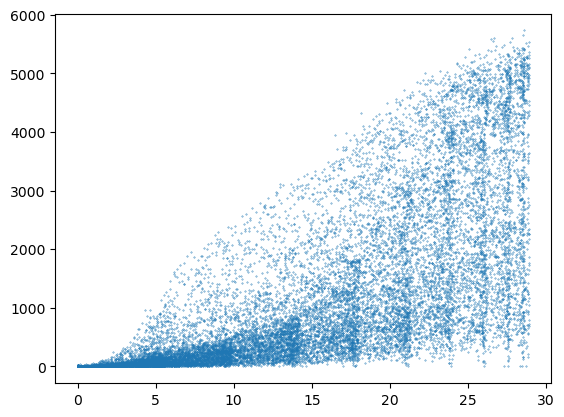

In [46]:
plt.scatter(X_train_a['clear_sky_rad:W']**.5,X_train_a.pv_measurement,s=.1)

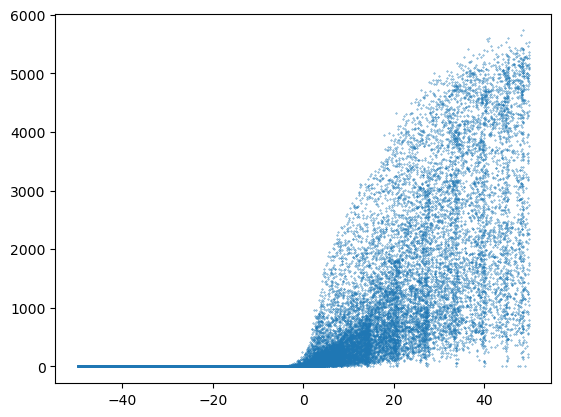

In [59]:
plt.scatter((X_train_a['sun_elevation:d']**1),X_train_a.pv_measurement,s=.1)

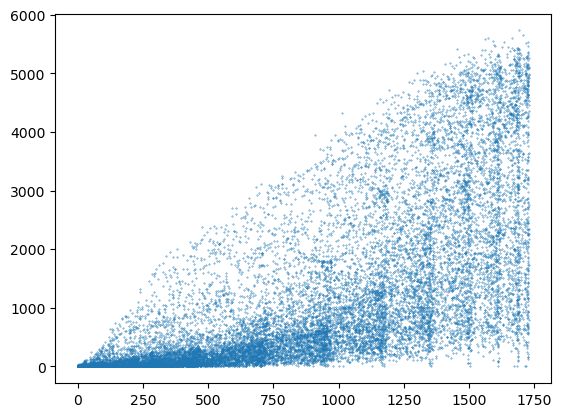

In [63]:
plt.scatter((X_train_a['clear_sky_energy_1h:J']**.5),X_train_a.pv_measurement,s=.1)

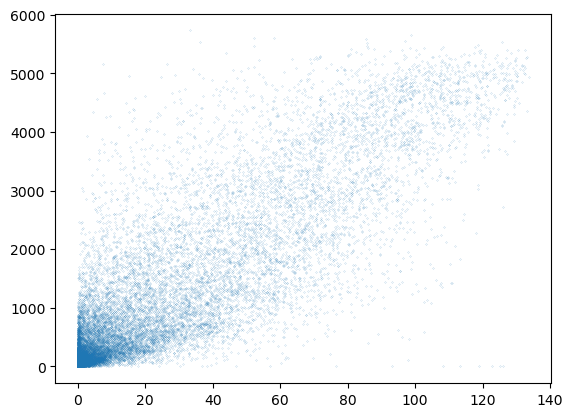

In [68]:
plt.scatter((X_train_a['direct_rad:W']**.75),X_train_a.pv_measurement,s=.01)

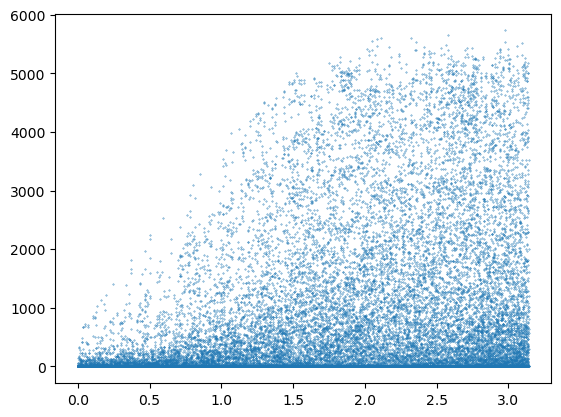

In [76]:
plt.scatter(np.arccos(X_train_a['Year cos']**1),X_train_a.pv_measurement,s=.1)

In [25]:
X_train_observed_a.columns.tolist()

['absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'ceiling_height_agl:m',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'cloud_base_agl:m',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad:W',
 'direct_rad_1h:J',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_density:kgm3',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms',
 'Day sin',
 'Day cos',
 '

# Example TS Forecasting

In [109]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

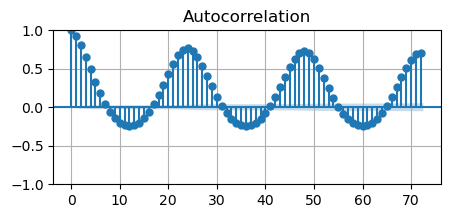

In [120]:
fig, ax = plt.subplots(figsize=(5, 2))
plot_acf(X_train_a.pv_measurement, ax=ax, lags=24*3)
plt.grid()
plt.show()

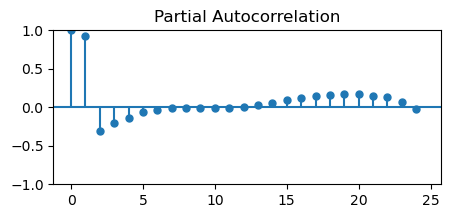

In [121]:
fig, ax = plt.subplots(figsize=(5, 2))
plot_pacf(X_train_a.pv_measurement, ax=ax, lags=24)
plt.show()

# autoregreessif model

<Axes: xlabel='date_forecast'>

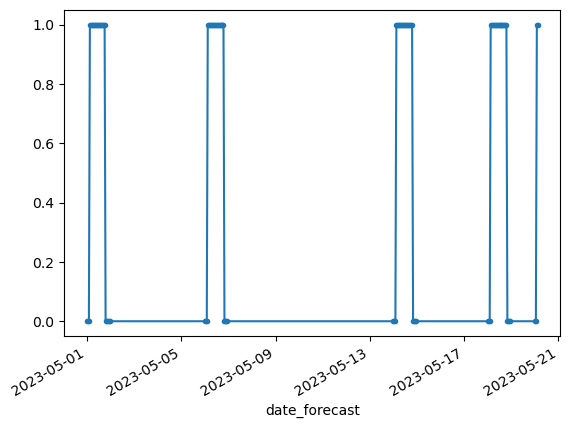

In [141]:
X_test_estimated_a['is_day:idx'][:100].plot(marker='.')#	sun_elevation:d

In [134]:
X_test_estimated_a.index

DatetimeIndex(['2023-05-01 00:00:00', '2023-05-01 01:00:00',
               '2023-05-01 02:00:00', '2023-05-01 03:00:00',
               '2023-05-01 04:00:00', '2023-05-01 05:00:00',
               '2023-05-01 06:00:00', '2023-05-01 07:00:00',
               '2023-05-01 08:00:00', '2023-05-01 09:00:00',
               ...
               '2023-07-03 14:00:00', '2023-07-03 15:00:00',
               '2023-07-03 16:00:00', '2023-07-03 17:00:00',
               '2023-07-03 18:00:00', '2023-07-03 19:00:00',
               '2023-07-03 20:00:00', '2023-07-03 21:00:00',
               '2023-07-03 22:00:00', '2023-07-03 23:00:00'],
              dtype='datetime64[us]', name='date_forecast', length=720, freq=None)

In [167]:
X_train_a['lag_1']

2019-06-02 22:00:00       NaN
2019-06-02 23:00:00      0.00
2019-06-03 00:00:00      0.00
2019-06-03 01:00:00      0.00
2019-06-03 02:00:00      0.00
                        ...  
2023-04-30 19:00:00    194.70
2023-04-30 20:00:00      9.02
2023-04-30 21:00:00      0.00
2023-04-30 22:00:00      0.00
2023-04-30 23:00:00      0.00
Name: lag_1, Length: 34061, dtype: float64

In [137]:
X_test_estimated_a['lag_1'] = None  

In [150]:
X_test_estimated_a['lag_1'].index

DatetimeIndex(['2023-05-01 00:00:00', '2023-05-01 01:00:00',
               '2023-05-01 02:00:00', '2023-05-01 03:00:00',
               '2023-05-01 04:00:00', '2023-05-01 05:00:00',
               '2023-05-01 06:00:00', '2023-05-01 07:00:00',
               '2023-05-01 08:00:00', '2023-05-01 09:00:00',
               ...
               '2023-07-03 14:00:00', '2023-07-03 15:00:00',
               '2023-07-03 16:00:00', '2023-07-03 17:00:00',
               '2023-07-03 18:00:00', '2023-07-03 19:00:00',
               '2023-07-03 20:00:00', '2023-07-03 21:00:00',
               '2023-07-03 22:00:00', '2023-07-03 23:00:00'],
              dtype='datetime64[us]', name='date_forecast', length=720, freq=None)

In [153]:
(['2023-05-01 00:00:00','2023-05-01 07:00:00'])

NameError: name 'DatetimeIndex' is not defined

# Differentiate

In [147]:
test = pd.DataFrame([1,2,3,4,8,16,32], columns=['t'], index=)

In [148]:
test

t
0   1
1   2
2   3
3   4
4   8
5  16
6  32

In [78]:
pip install -q skforecast

Note: you may need to restart the kernel to use updated packages.


In [79]:
from skforecast.preprocessing import TimeSeriesDifferentiator

In [91]:
diferenciator = TimeSeriesDifferentiator(order=1)
data_diff = diferenciator.fit_transform(X_train_a.pv_measurement)
X_train_a['diff_1'] = pd.Series(data_diff, index=X_train_a.index).dropna()

In [92]:
diferenciator = TimeSeriesDifferentiator(order=2)
data_diff = diferenciator.fit_transform(X_train_a.pv_measurement)
X_train_a['diff_2'] = pd.Series(data_diff, index=X_train_a.index).dropna()

In [93]:
diferenciator = TimeSeriesDifferentiator(order=3)
data_diff = diferenciator.fit_transform(X_train_a.pv_measurement)
X_train_a['diff_3'] = pd.Series(data_diff, index=X_train_a.index).dropna()

In [97]:
diferenciator = TimeSeriesDifferentiator(order=24)
data_diff = diferenciator.fit_transform(X_train_a.pv_measurement)
X_train_a['diff_24'] = pd.Series(data_diff, index=X_train_a.index).dropna()

In [101]:
month = 24*30
diferenciator = TimeSeriesDifferentiator(order=month)
data_diff = diferenciator.fit_transform(X_train_a.pv_measurement)
X_train_a['diff_month'] = pd.Series(data_diff, index=X_train_a.index).dropna()

In [90]:
X_train_a['diff_1'] = data_diff

In [158]:
X_train_a.diff_2

2019-06-02 22:00:00       NaN
2019-06-02 23:00:00       NaN
2019-06-03 00:00:00      0.00
2019-06-03 01:00:00      0.00
2019-06-03 02:00:00     19.36
                        ...  
2023-04-30 19:00:00    312.18
2023-04-30 20:00:00    176.66
2023-04-30 21:00:00      9.02
2023-04-30 22:00:00      0.00
2023-04-30 23:00:00      0.00
Name: diff_2, Length: 34061, dtype: float64

In [177]:
len(X_test_estimated_c)/24

30.0

In [169]:
X_train_a.loc['2023-04-30 23:00:00','lag_1']

0.0

In [173]:
str(X_train_a.index[0])

'2019-06-02 22:00:00'

In [122]:
X_train_a['lag_1'] = X_train_a['pv_measurement'].shift(1)

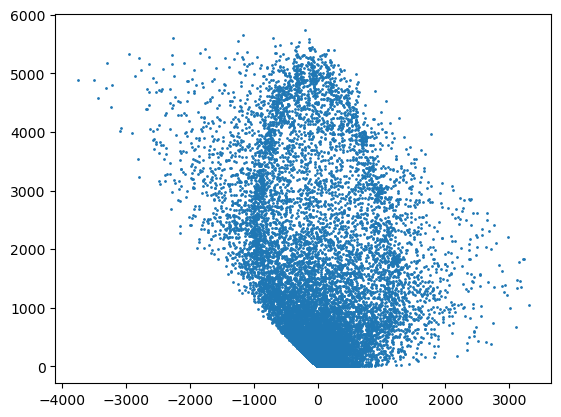

In [126]:
plt.scatter(X_train_a.diff_1,X_train_a.lag_1,s=1)

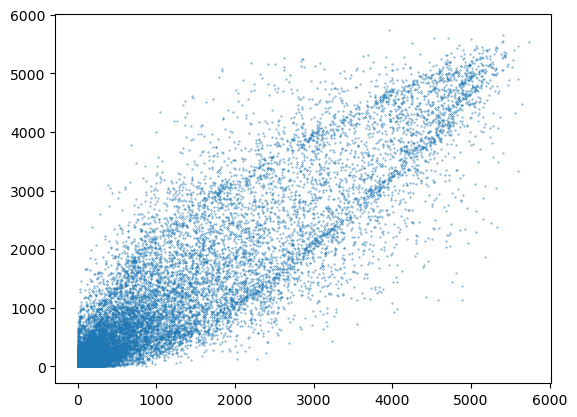

In [128]:
plt.scatter(X_train_a.lag_1,X_train_a.pv_measurement,s=.1)

<Axes: >

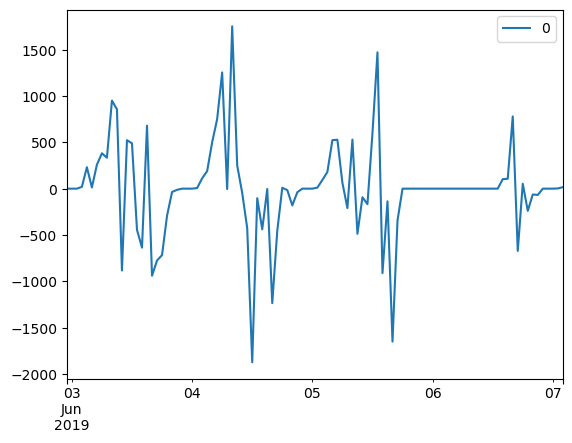

In [86]:
pd.DataFrame(data_diff)[:100].plot()

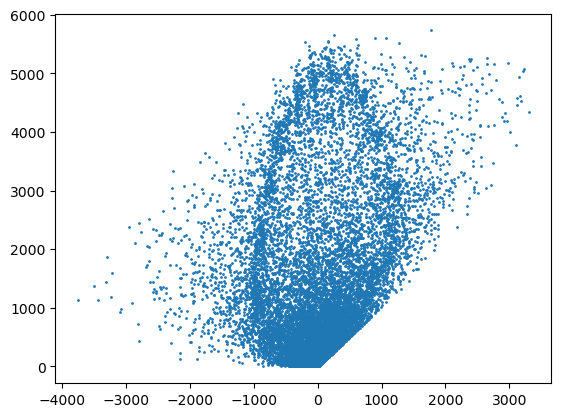

In [107]:
plt.scatter((X_train_a['diff_1']**1),X_train_a.pv_measurement**1,s=1)

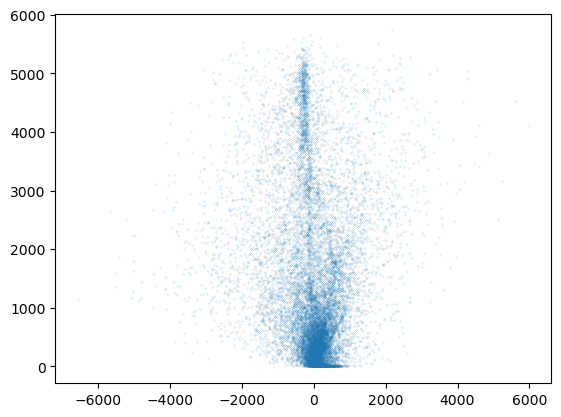

In [95]:
plt.scatter((X_train_a['diff_2']**1),X_train_a.pv_measurement,s=.01)

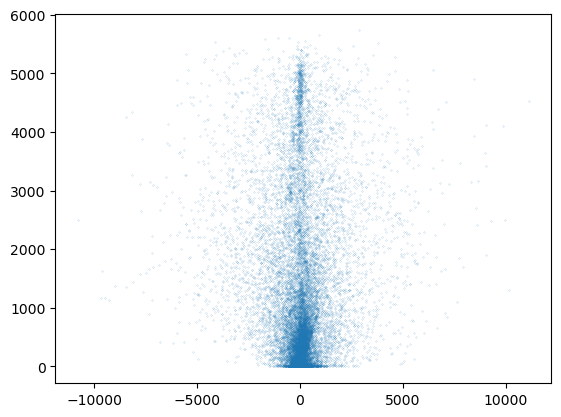

In [96]:
plt.scatter((X_train_a['diff_3']**1),X_train_a.pv_measurement,s=.01)

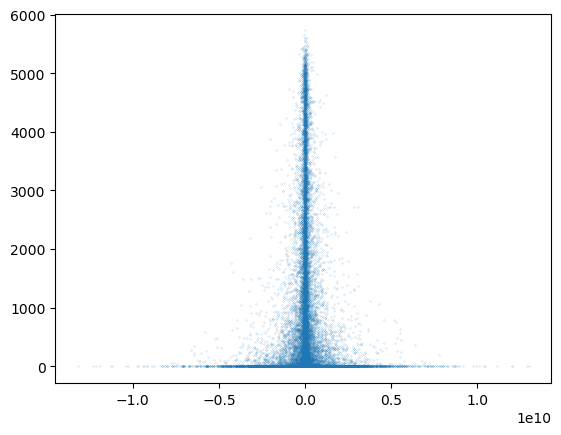

In [98]:
plt.scatter((X_train_a['diff_24']**1),X_train_a.pv_measurement,s=.01)

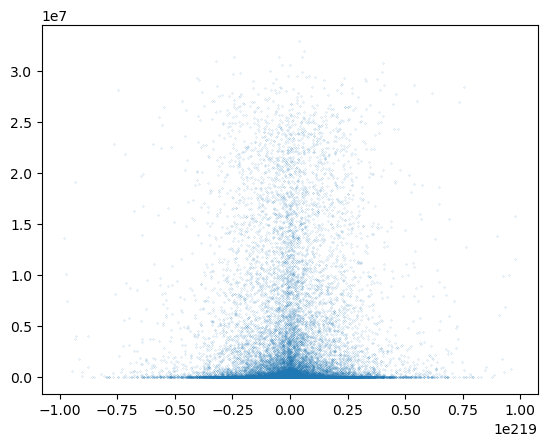

In [103]:
plt.scatter((X_train_a['diff_month']**1),X_train_a.pv_measurement**2,s=.01)

# For each features

### absolute_humidity_2m:gm3

                            count     mean       std  min   25%  50%  75%  \
absolute_humidity_2m:gm3  29667.0  6.65259  2.795383  0.7  4.45  6.3  8.6   

                            max  
absolute_humidity_2m:gm3  17.35  


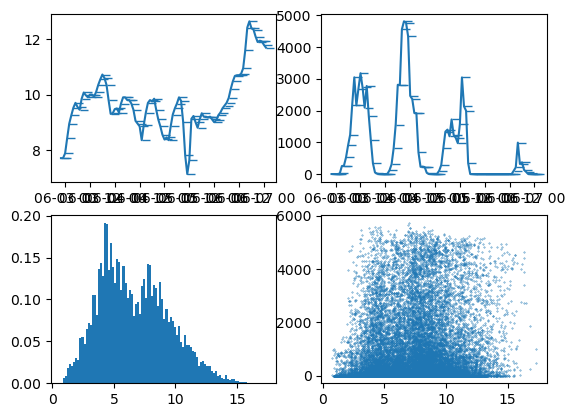

In [176]:
analysis('absolute_humidity_2m:gm3')

<Axes: >

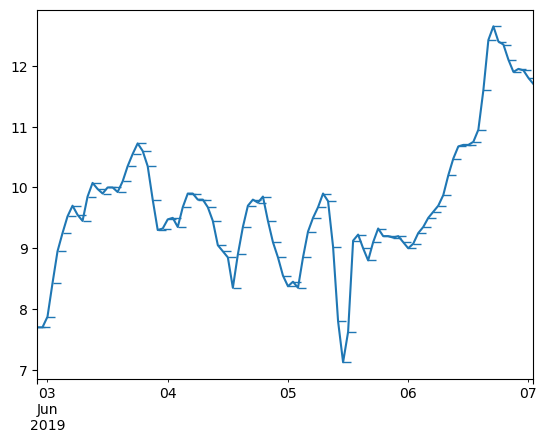

In [130]:
X_train_observed_a['absolute_humidity_2m:gm3'][:100].plot(marker=True)

In [131]:
X_train_observed_a['absolute_humidity_2m:gm3'].describe()

count    29667.000000
mean         6.652590
std          2.795383
min          0.700000
25%          4.450000
50%          6.300000
75%          8.600000
max         17.350000
Name: absolute_humidity_2m:gm3, dtype: float64

<Axes: xlabel='absolute_humidity_2m:gm3', ylabel='Count'>

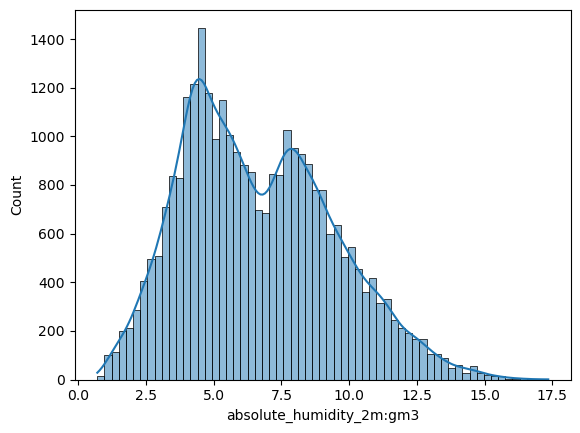

In [133]:
sns.histplot(X_train_observed_a['absolute_humidity_2m:gm3'], kde=True)

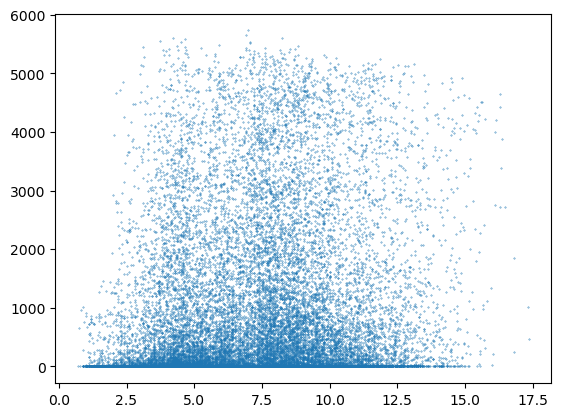

In [141]:
plt.scatter(X_train_observed_a['absolute_humidity_2m:gm3'],train_a_observed,s=.1)

### air_density_2m:kgm3

<Axes: >

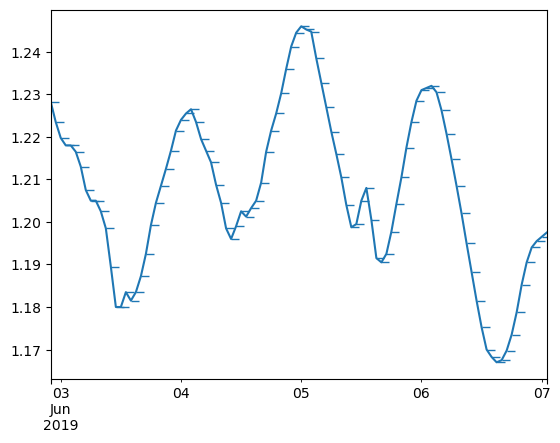

In [142]:
X_train_observed_a['air_density_2m:kgm3'][:100].plot(marker=True)

In [143]:
X_train_observed_a['air_density_2m:kgm3'].describe()

count    29667.000000
mean         1.249064
std          0.036304
min          1.145000
25%          1.224500
50%          1.246500
75%          1.272500
max          1.426250
Name: air_density_2m:kgm3, dtype: float64

<Axes: xlabel='air_density_2m:kgm3', ylabel='Count'>

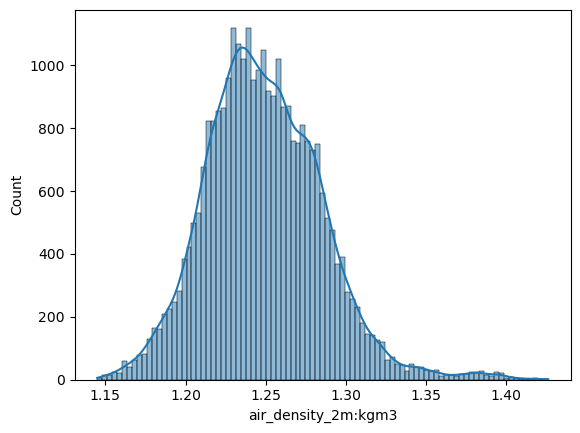

In [144]:
sns.histplot(X_train_observed_a['air_density_2m:kgm3'], kde=True)

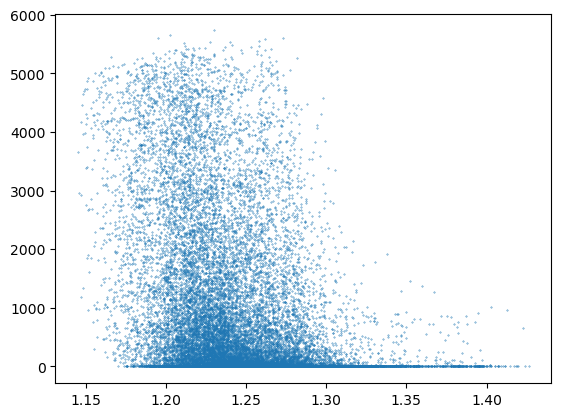

In [145]:
plt.scatter(X_train_observed_a['air_density_2m:kgm3'],train_a_observed,s=.1)

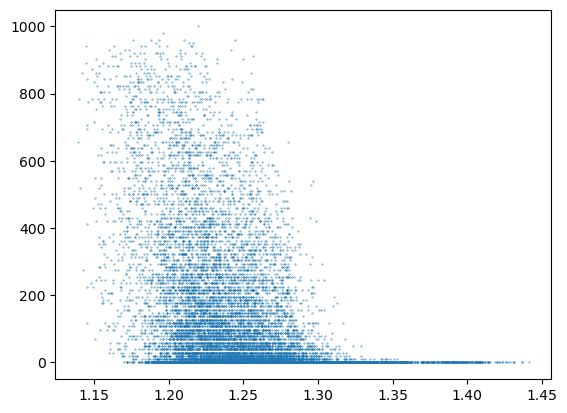

In [147]:
plt.scatter(X_train_observed_c['air_density_2m:kgm3'],train_c_observed,s=.1)

### ceiling_height_agl:m

In [188]:
def analysis(f):
    figure, axis = plt.subplots(2, 2) 

    axis[0, 0].plot(X_train_observed_a[f][:100], marker=True)
    axis[0, 1].plot(no[:100], marker=True)
    axis[1, 0].hist(X_train_observed_a[f], bins=100, density=True)
    axis[1, 1].scatter(X_train_observed_a[f],no, s=.1) 

    print(pd.DataFrame(X_train_observed_a[f]).describe().T)

                        count         mean          std        min  \
ceiling_height_agl:m  24466.0  2931.677002  2571.665527  27.849998   

                              25%          50%          75%           max  
ceiling_height_agl:m  1116.481201  1908.087524  4035.006348  12285.650391  


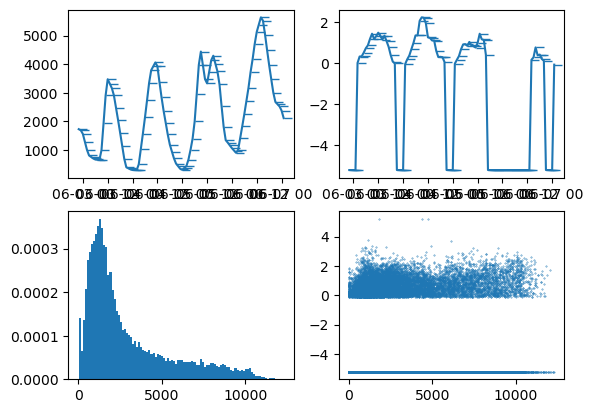

In [189]:
analysis('ceiling_height_agl:m')

### clear_sky_energy_1h:J

                         count       mean          std  min  25%  \
clear_sky_energy_1h:J  29667.0  599406.75  877493.0625  0.0  0.0   

                                50%           75%        max  
clear_sky_energy_1h:J  41072.101562  1.025277e+06  2988627.5  


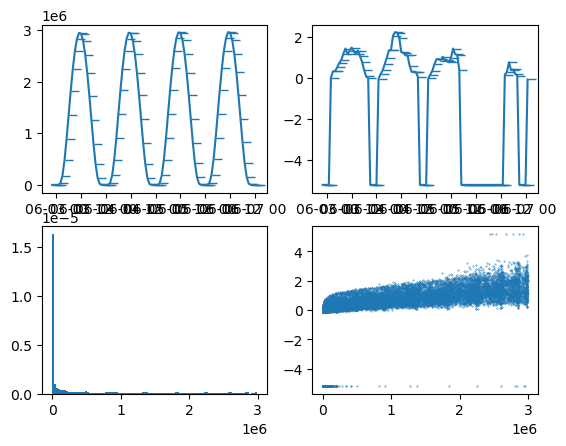

In [190]:
analysis('clear_sky_energy_1h:J')

In [192]:
X_train_observed_a.columns[4:]

Index(['clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_density:kgm3', 'snow_depth:cm',
       'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms',
       'wind_speed_w_1000hPa:ms'],
      dtype='object')

                   count        mean         std  min  25%    50%         75%  \
clear_sky_rad:W  29667.0  166.501816  244.373398  0.0  0.0  9.925  291.737503   

                        max  
clear_sky_rad:W  835.099976  


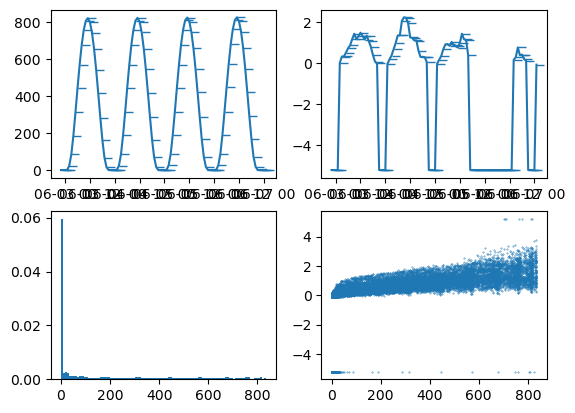

In [194]:
i = 4
f = X_train_observed_a.columns[i]
analysis(f)

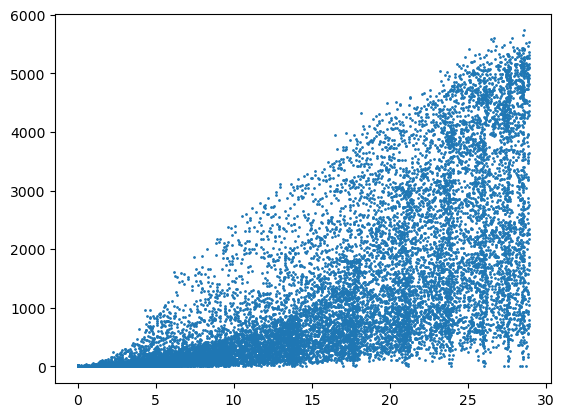

In [19]:
plt.scatter(X_train_observed_a[X_train_observed_a.columns[4]]**.5,train_a_observed,s=1)

                    count         mean          std   min     25%      50%  \
cloud_base_agl:m  27800.0  1749.091187  1818.635864  27.9  596.25  1174.75   

                          75%        max  
cloud_base_agl:m  2096.600098  11673.625  


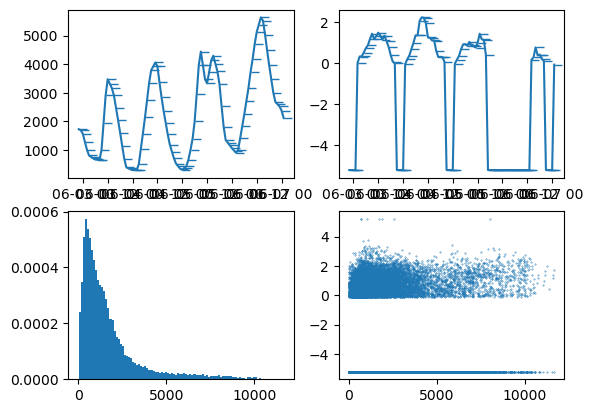

In [198]:
i = 5
f = X_train_observed_a.columns[i]
analysis(f)

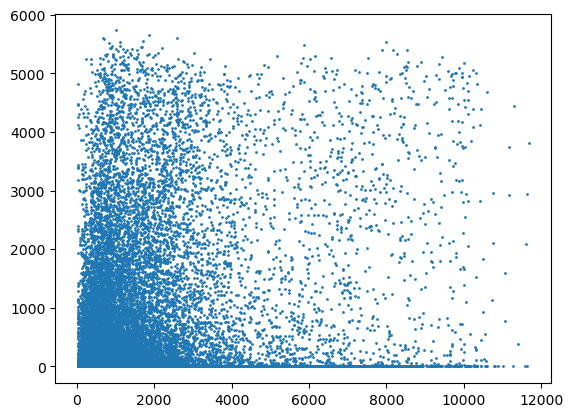

In [199]:
plt.scatter(X_train_observed_a[f],train_a_observed,s=1)

                   count      mean       std  min  25%  50%  75%  max
dew_or_rime:idx  29667.0  0.020966  0.182376 -1.0  0.0  0.0  0.0  1.0


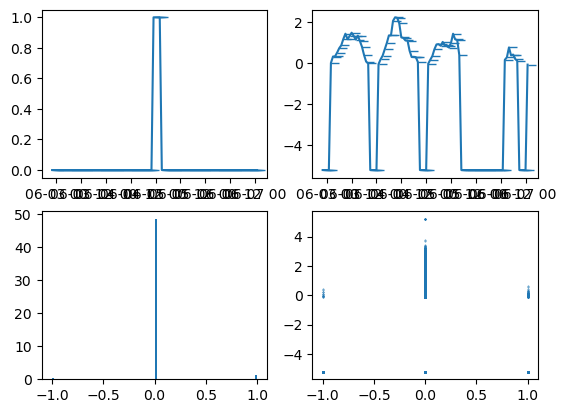

In [200]:
i = 6
f = X_train_observed_a.columns[i]
analysis(f)

                  count        mean       std         min         25%  \
dew_point_2m:K  29667.0  276.823364  6.700147  251.074997  272.075012   

                       50%         75%      max  
dew_point_2m:K  277.150024  281.950012  293.625  


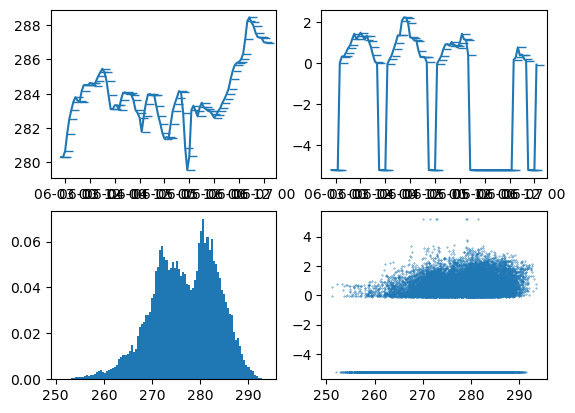

In [204]:
i = 7
f = X_train_observed_a.columns[i]
analysis(f)

                 count       mean        std  min  25%   50%        75%  \
diffuse_rad:W  29667.0  44.918659  64.514648  0.0  0.0  4.75  76.275002   

                      max  
diffuse_rad:W  332.274994  


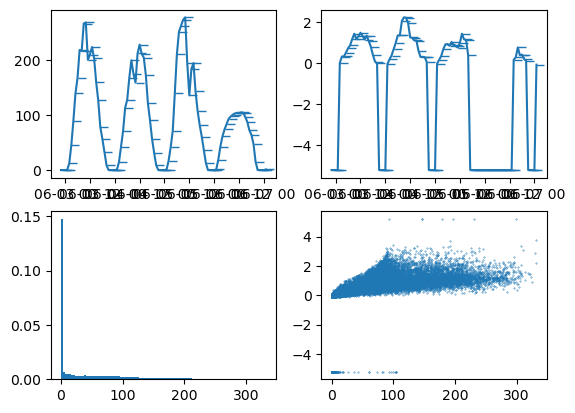

In [205]:
i = 8
f = X_train_observed_a.columns[i]
analysis(f)

                    count          mean            std  min  25%  \
diffuse_rad_1h:J  29667.0  161707.03125  229485.578125  0.0  0.0   

                           50%           75%         max  
diffuse_rad_1h:J  26047.175781  273976.34375  1191085.25  


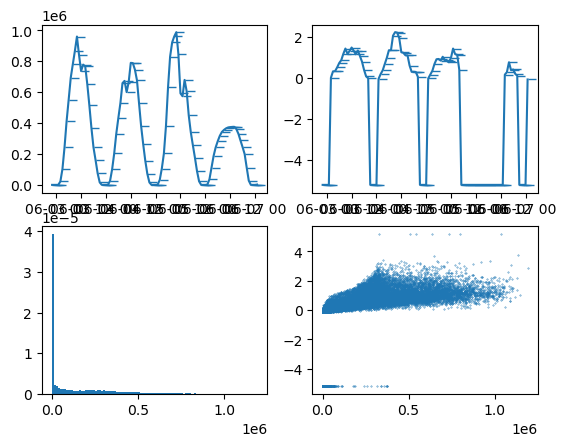

In [206]:
i = 9
f = X_train_observed_a.columns[i]
analysis(f)

                count       mean         std  min  25%  50%      75%  \
direct_rad:W  29667.0  56.612213  119.190834  0.0  0.0  0.0  42.9625   

                     max  
direct_rad:W  683.400024  


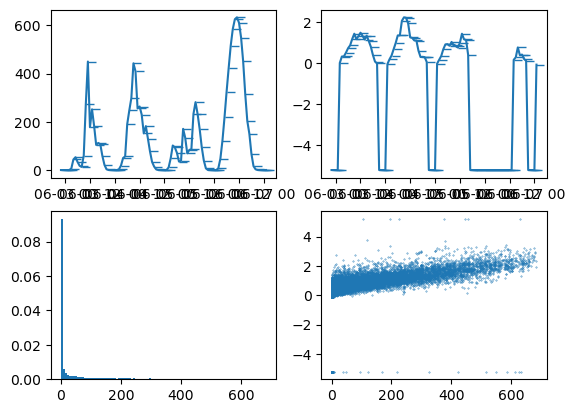

In [207]:
i = 10
f = X_train_observed_a.columns[i]
analysis(f)

In [301]:
#plt.scatter((X_train_observed_a[X_train_observed_a.columns[10]]),train_a_observed,s=.01)

sns.jointplot(X_train_observed_a[X_train_observed_a.columns[10]], 
              train_a_observed)#,              kind="regg", color="#ce1414")

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 were given

                   count           mean          std  min  25%         50%  \
direct_rad_1h:J  29667.0  203804.171875  423281.1875  0.0  0.0  749.974976   

                           75%        max  
direct_rad_1h:J  160012.546875  2441749.5  


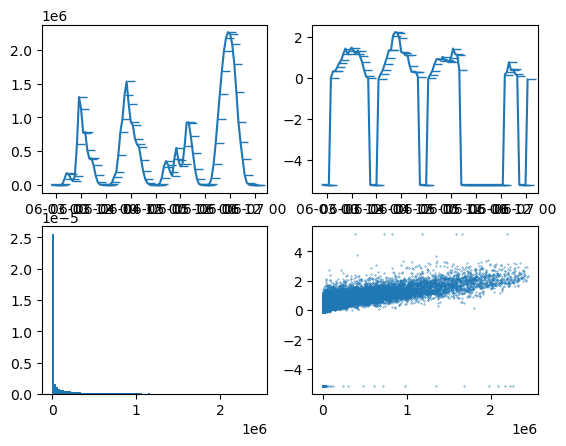

In [208]:
i = 11
f = X_train_observed_a.columns[i]
analysis(f)

                           count       mean        std  min        25%   50%  \
effective_cloud_cover:p  29667.0  67.606071  33.585804  0.0  43.525002  80.0   

                               75%    max  
effective_cloud_cover:p  98.525002  100.0  


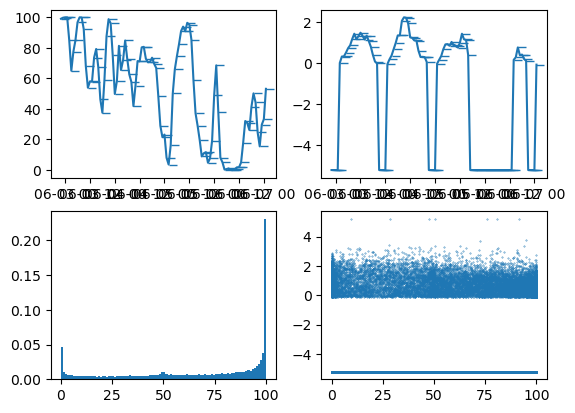

In [209]:
i = 12
f = X_train_observed_a.columns[i]
analysis(f)

               count  mean  std  min  25%  50%  75%  max
elevation:m  29667.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0


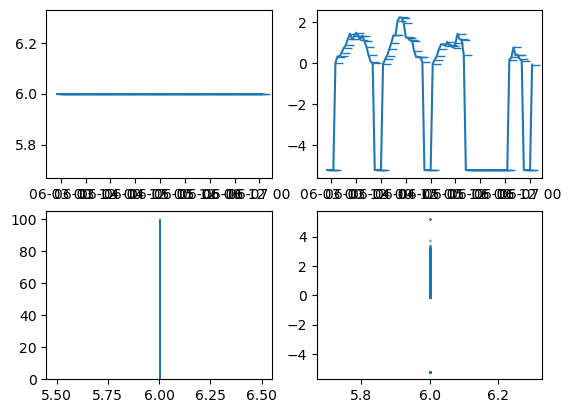

In [210]:
i = 13
f = X_train_observed_a.columns[i]
analysis(f)

                     count      mean       std  min  25%  50%  75%   max
fresh_snow_12h:cm  29667.0  0.053118  0.487001  0.0  0.0  0.0  0.0  15.0


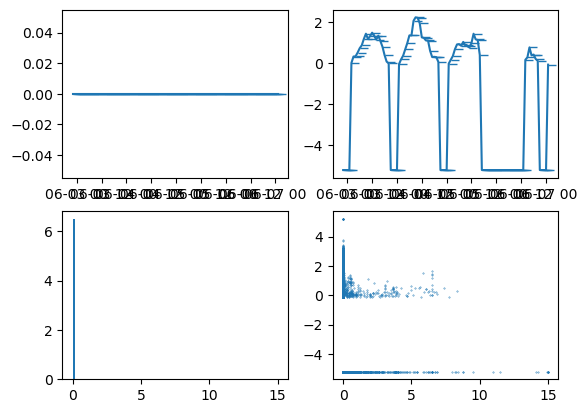

In [211]:
i = 14
f = X_train_observed_a.columns[i]
analysis(f)

                    count      mean       std  min  25%  50%  75%   max
fresh_snow_1h:cm  29667.0  0.004418  0.070276  0.0  0.0  0.0  0.0  3.55


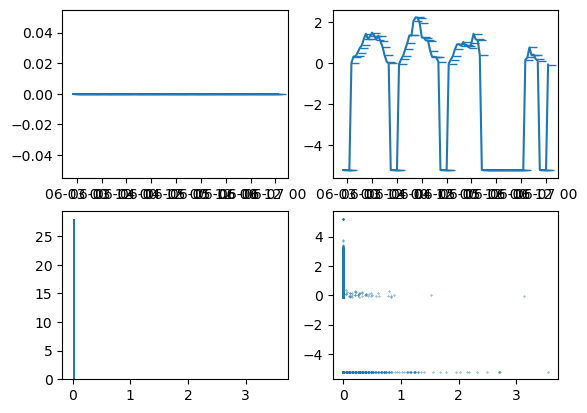

In [212]:
i = 15
f = X_train_observed_a.columns[i]
analysis(f)

                     count      mean       std  min  25%  50%  75%   max
fresh_snow_24h:cm  29667.0  0.106243  0.743069  0.0  0.0  0.0  0.0  15.0


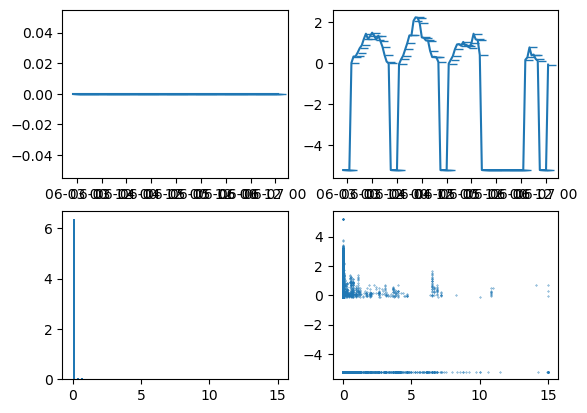

In [213]:
i = 16
f = X_train_observed_a.columns[i]
analysis(f)

                    count      mean       std  min  25%  50%  75%    max
fresh_snow_3h:cm  29667.0  0.013277  0.177694  0.0  0.0  0.0  0.0  7.875


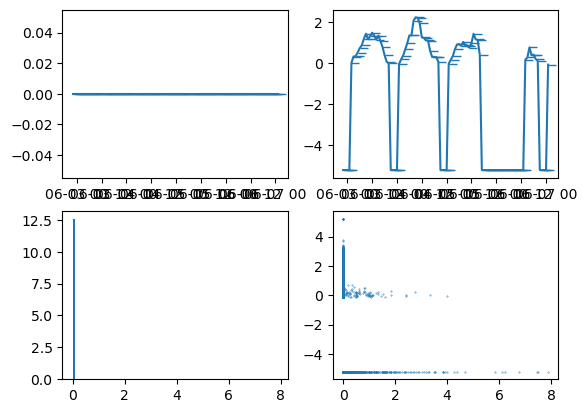

In [214]:
i = 17
f = X_train_observed_a.columns[i]
analysis(f)

                    count      mean       std  min  25%  50%  75%     max
fresh_snow_6h:cm  29667.0  0.026567  0.302986  0.0  0.0  0.0  0.0  14.225


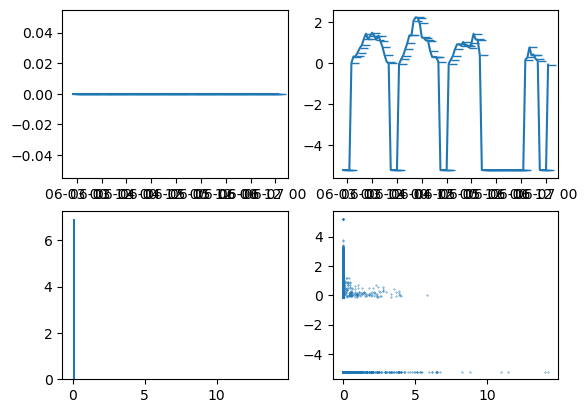

In [215]:
i = 18
f = X_train_observed_a.columns[i]
analysis(f)

              count      mean       std  min  25%  50%  75%  max
is_day:idx  29667.0  0.508545  0.499998  0.0  0.0  1.0  1.0  1.0


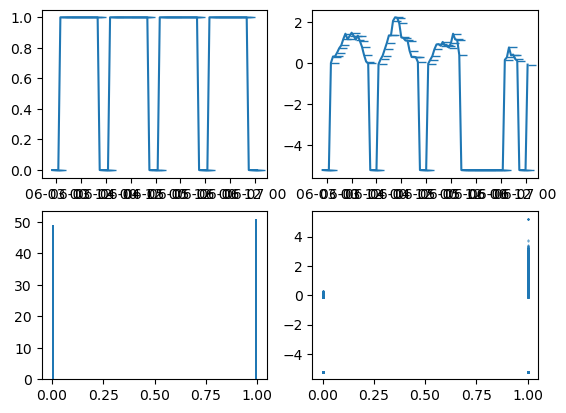

In [216]:
i = 19
f = X_train_observed_a.columns[i]
analysis(f)

                    count      mean       std  min  25%  50%  75%  max
is_in_shadow:idx  29667.0  0.502713  0.500006  0.0  0.0  1.0  1.0  1.0


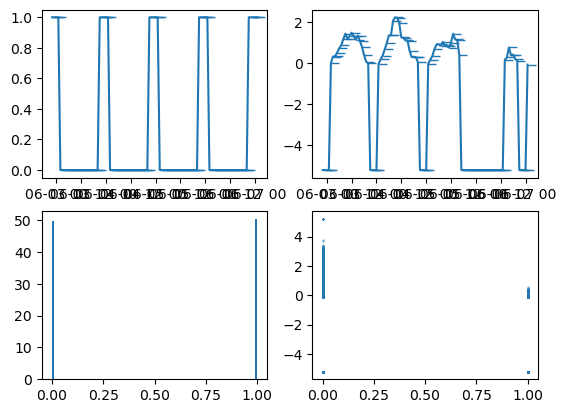

In [217]:
i = 20
f = X_train_observed_a.columns[i]
analysis(f)

                    count         mean        std         min        25%  \
msl_pressure:hPa  29667.0  1009.632812  12.484144  944.400024  1002.0625   

                          50%          75%          max  
msl_pressure:hPa  1010.700012  1018.299988  1043.949951  


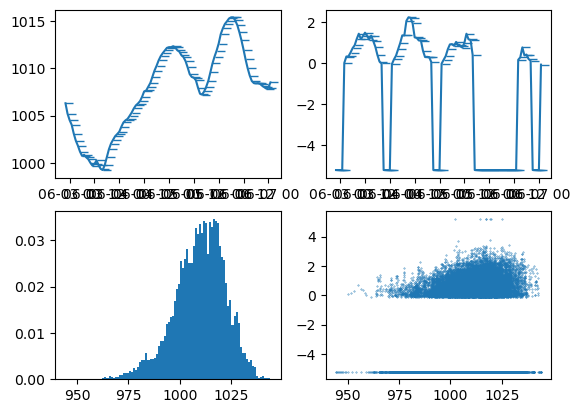

In [218]:
i = 21
f = X_train_observed_a.columns[i]
analysis(f)

                  count      mean       std  min  25%  50%  75%     max
precip_5min:mm  29667.0  0.006302  0.031467  0.0  0.0  0.0  0.0  0.6225


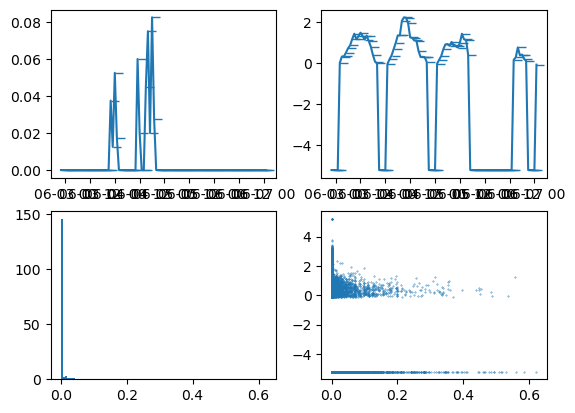

In [219]:
i = 22
f = X_train_observed_a.columns[i]
analysis(f)

                        count      mean      std  min  25%  50%  75%  max
precip_type_5min:idx  29667.0  0.078404  0.33471  0.0  0.0  0.0  0.0  4.0


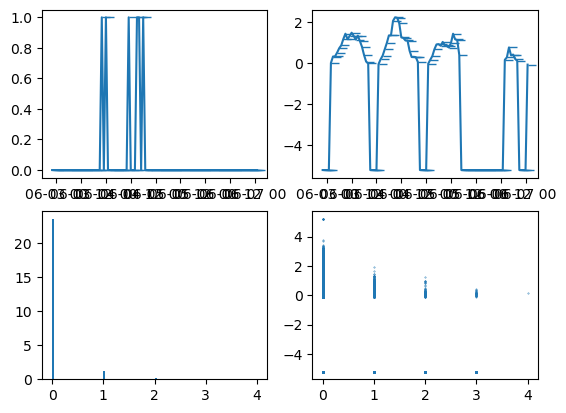

In [220]:
i = 23
f = X_train_observed_a.columns[i]
analysis(f)

                     count       mean        std         min         25%  \
pressure_100m:hPa  29667.0  996.76532  12.350167  932.400024  989.275024   

                       50%       75%       max  
pressure_100m:hPa  997.875  1005.375  1030.875  


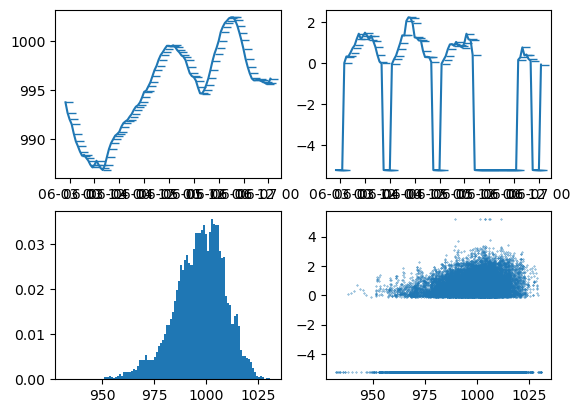

In [222]:
i = 24
f = X_train_observed_a.columns[i]
analysis(f)

                    count         mean        std         min         25%  \
pressure_50m:hPa  29667.0  1002.868164  12.404194  938.200012  995.349976   

                          50%     75%      max  
pressure_50m:hPa  1003.949951  1011.5  1037.25  


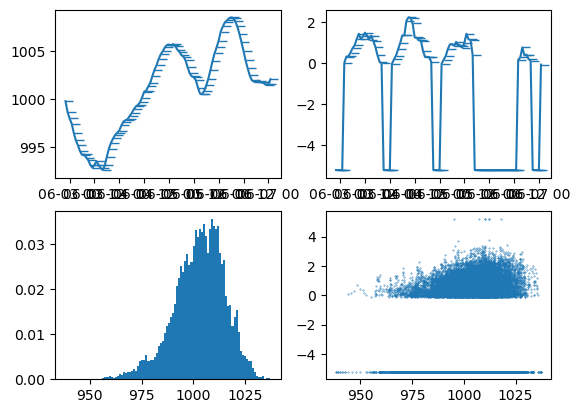

In [223]:
i = 25
f = X_train_observed_a.columns[i]
analysis(f)

               count    mean       std  min  25%  50%  75%        max
prob_rime:p  29667.0  0.1874  2.484636  0.0  0.0  0.0  0.0  82.349998


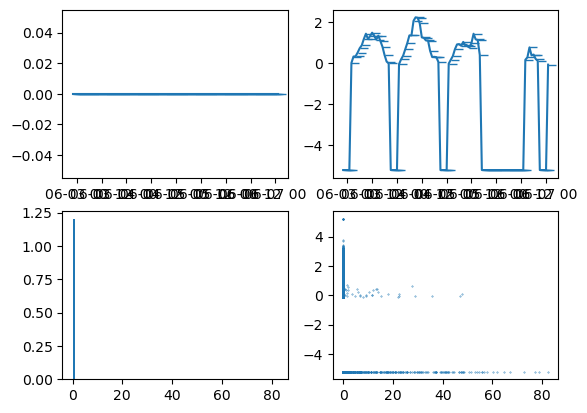

In [224]:
i = 26
f = X_train_observed_a.columns[i]
analysis(f)

                   count      mean       std  min  25%  50%  75%  max
rain_water:kgm2  29667.0  0.011914  0.046233  0.0  0.0  0.0  0.0  1.1


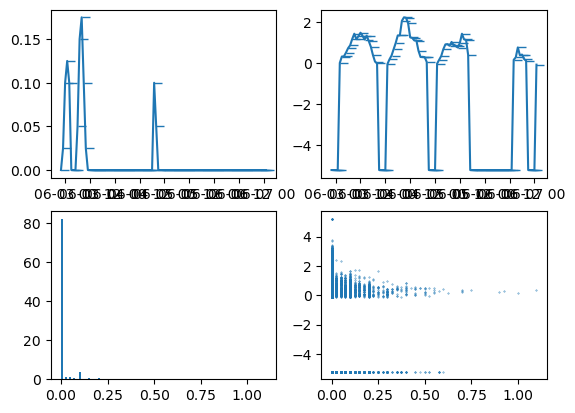

In [225]:
i = 27
f = X_train_observed_a.columns[i]
analysis(f)

                               count       mean        std        min   25%  \
relative_humidity_1000hPa:p  29667.0  74.231606  13.855135  22.700001  65.0   

                                   50%        75%    max  
relative_humidity_1000hPa:p  76.674995  85.425003  100.0  


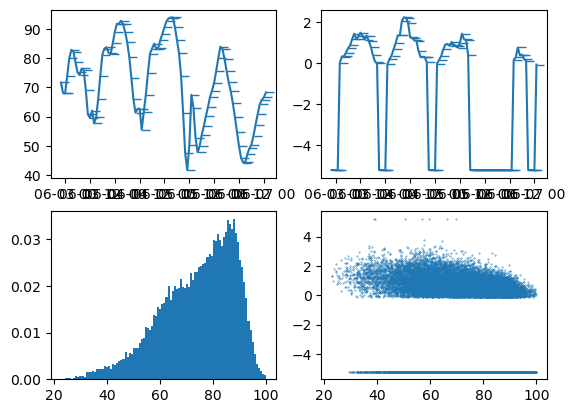

In [226]:
i = 28
f = X_train_observed_a.columns[i]
analysis(f)

                    count        mean        std    min          25%     50%  \
sfc_pressure:hPa  29667.0  1008.99823  12.460234  944.0  1001.450012  1010.0   

                          75%          max  
sfc_pressure:hPa  1017.650024  1043.724976  


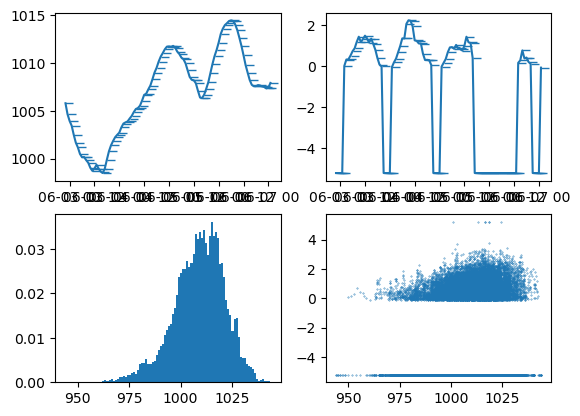

In [227]:
i = 29
f = X_train_observed_a.columns[i]
analysis(f)

                   count   mean  std    min    25%    50%    75%    max
snow_density:kgm3  688.0  250.0  0.0  250.0  250.0  250.0  250.0  250.0


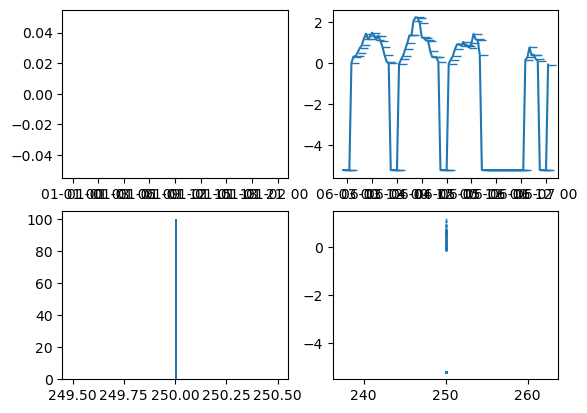

In [228]:
i = 30
f = X_train_observed_a.columns[i]
analysis(f)

                 count      mean       std  min  25%  50%  75%  max
snow_depth:cm  29667.0  0.052763  0.409433  0.0  0.0  0.0  0.0  6.3


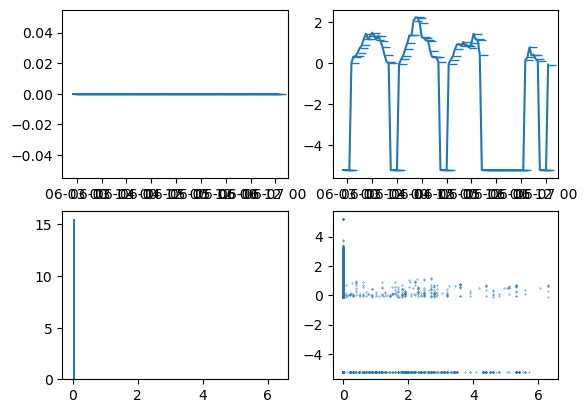

In [232]:
i = 31
f = X_train_observed_a.columns[i]
analysis(f)

                  count  mean  std  min  25%  50%  75%  max
snow_drift:idx  29667.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


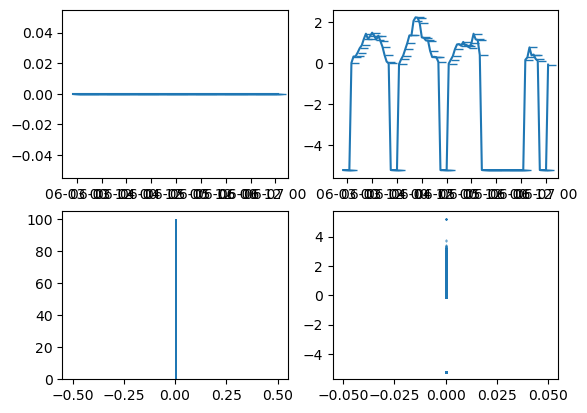

In [233]:
i = 32
f = X_train_observed_a.columns[i]
analysis(f)

                      count      mean       std  min  25%  50%  75%   max
snow_melt_10min:mm  29667.0  0.000062  0.001853  0.0  0.0  0.0  0.0  0.12


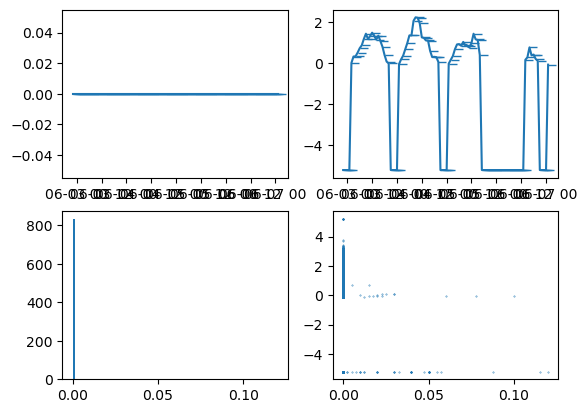

In [234]:
i = 33
f = X_train_observed_a.columns[i]
analysis(f)

                   count      mean       std  min  25%  50%  75%   max
snow_water:kgm2  29667.0  0.091566  0.244232  0.0  0.0  0.0  0.1  5.65


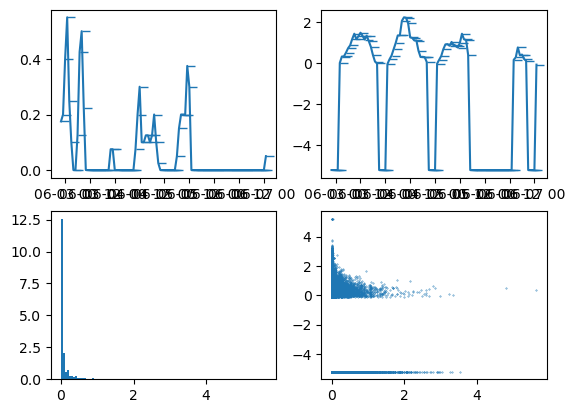

In [235]:
i = 34
f = X_train_observed_a.columns[i]
analysis(f)

                 count        mean       std    min        25%         50%  \
sun_azimuth:d  29667.0  179.630722  98.16745  6.983  93.631001  180.102997   

                     75%         max  
sun_azimuth:d  266.02774  348.486511  


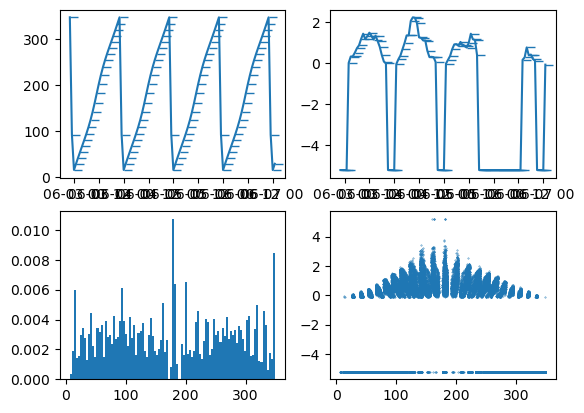

In [236]:
i = 35
f = X_train_observed_a.columns[i]
analysis(f)

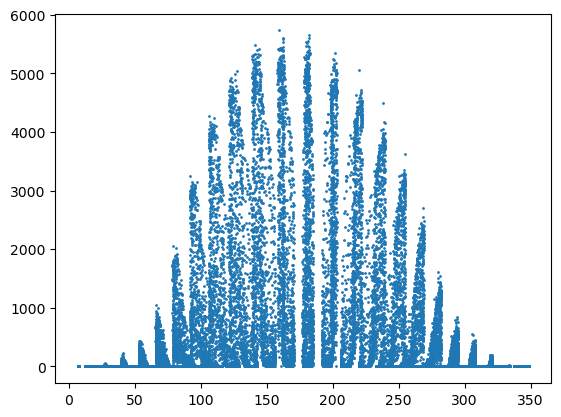

In [257]:
f = X_train_observed_a.columns[35]
plt.scatter((X_train_observed_a[f]),train_a_observed,s=1)

                   count      mean        std        min      25%    50%  \
sun_elevation:d  29667.0  1.529839  24.108591 -49.893997 -14.9315  1.151   

                       75%        max  
sun_elevation:d  19.171375  49.905502  


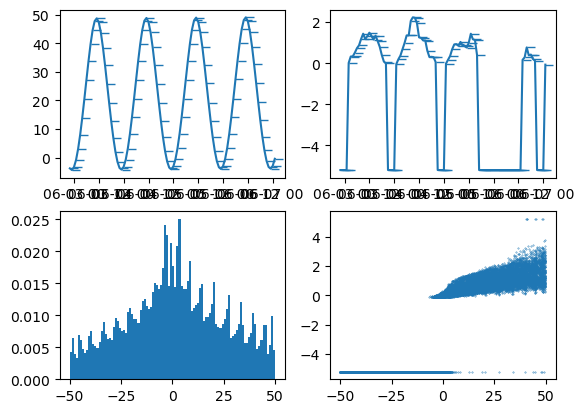

In [237]:
i = 36
f = X_train_observed_a.columns[i]
analysis(f)

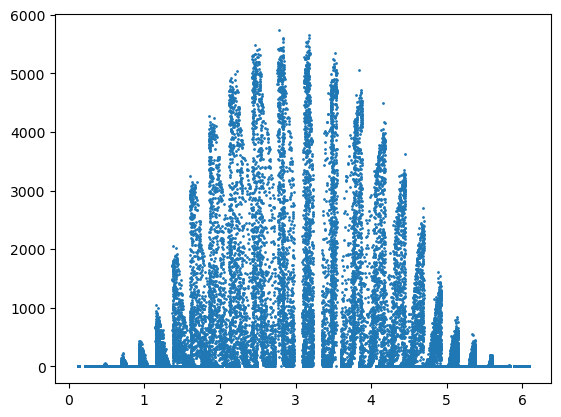

In [264]:
f = X_train_observed_a.columns[35]
plt.scatter((X_train_observed_a[f]*np.pi/180),train_a_observed,s=1)

                                  count      mean       std  min  25%  50%  \
super_cooled_liquid_water:kgm2  29667.0  0.059088  0.106668  0.0  0.0  0.0   

                                75%  max  
super_cooled_liquid_water:kgm2  0.1  1.3  


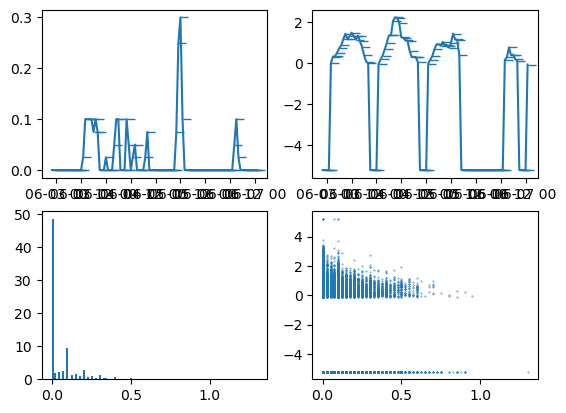

In [238]:
i = 37
f = X_train_observed_a.columns[i]
analysis(f)

               count        mean       std    min         25%         50%  \
t_1000hPa:K  29667.0  280.708588  6.572106  259.0  275.924988  280.650024   

                    75%     max  
t_1000hPa:K  285.174988  303.25  


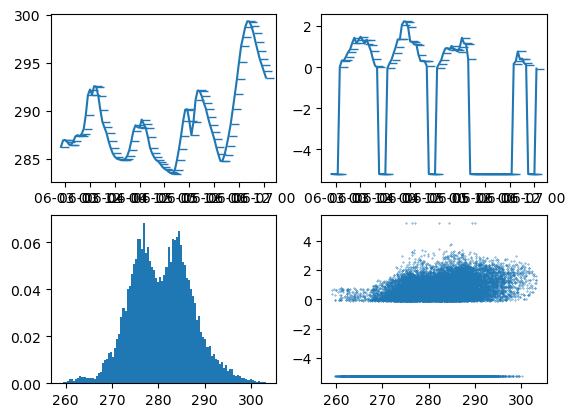

In [239]:
i = 38
f = X_train_observed_a.columns[i]
analysis(f)

                       count       mean        std  min        25%        50%  \
total_cloud_cover:p  29667.0  74.401703  33.176266  0.0  55.174999  93.025002   

                           75%    max  
total_cloud_cover:p  99.900002  100.0  


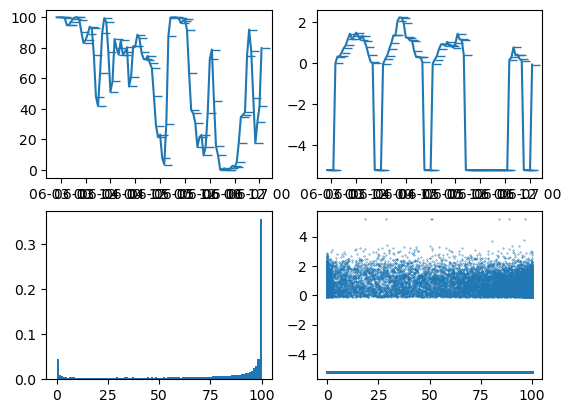

In [240]:
i = 39
f = X_train_observed_a.columns[i]
analysis(f)

                count          mean           std         min           25%  \
visibility:m  29667.0  32446.953125  17827.720703  159.675003  15975.662598   

                  50%           75%           max  
visibility:m  36148.0  47959.085938  69395.523438  


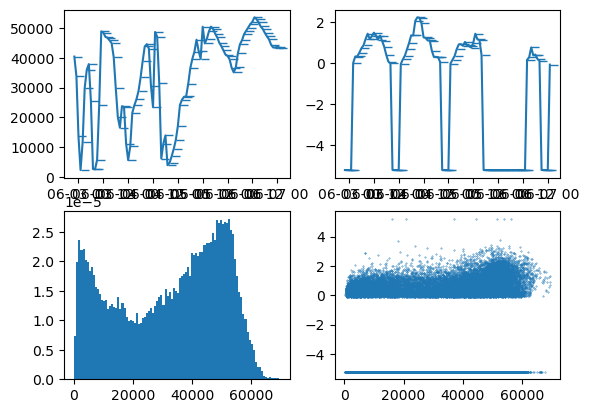

In [241]:
i = 40
f = X_train_observed_a.columns[i]
analysis(f)

                      count      mean       std  min  25%  50%  75%   max
snow_melt_10min:mm  29667.0  0.000062  0.001853  0.0  0.0  0.0  0.0  0.12


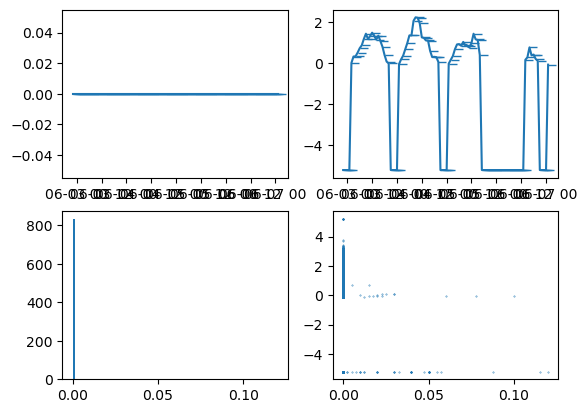

In [231]:
i = 41
f = X_train_observed_a.columns[i]
analysis(f)

                       count      mean       std    min  25%    50%  75%   max
wind_speed_u_10m:ms  29667.0  0.756796  2.850588 -7.225 -1.4  0.425  2.7  11.2


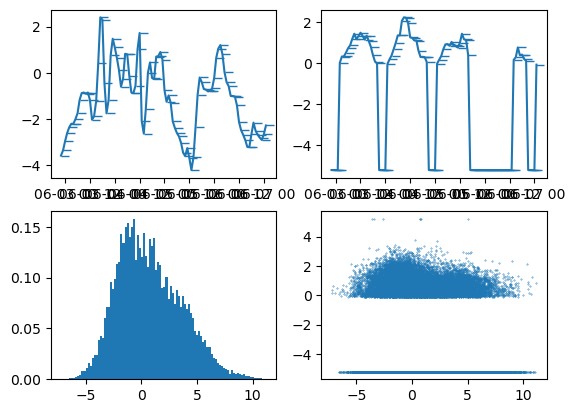

In [242]:
i = 42
f = X_train_observed_a.columns[i]
analysis(f)

                       count      mean      std  min    25%  50%   75%   max
wind_speed_v_10m:ms  29667.0  0.517433  1.84266 -8.4 -0.725  0.5  1.65  8.25


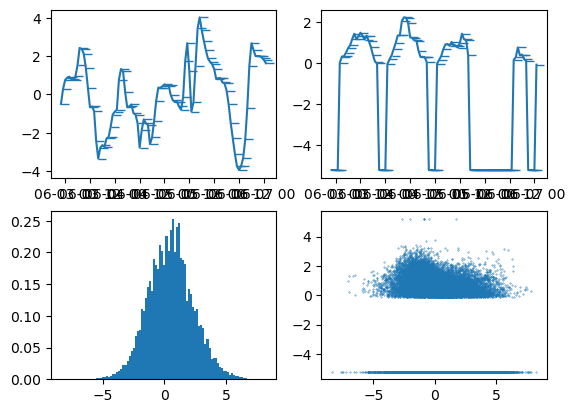

In [243]:
i = 43
f = X_train_observed_a.columns[i]
analysis(f)

                           count      mean      std  min  25%  50%  75%  max
wind_speed_w_1000hPa:ms  29667.0  0.000019  0.00124  0.0  0.0  0.0  0.0  0.1


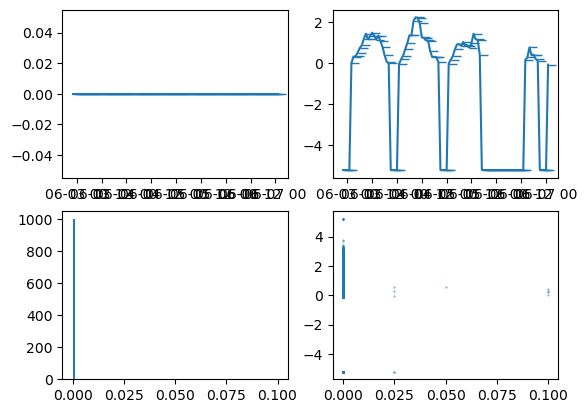

In [244]:
i = 44
f = X_train_observed_a.columns[i]
analysis(f)

In [282]:
X_train_observed_a.shape

(29667, 45)

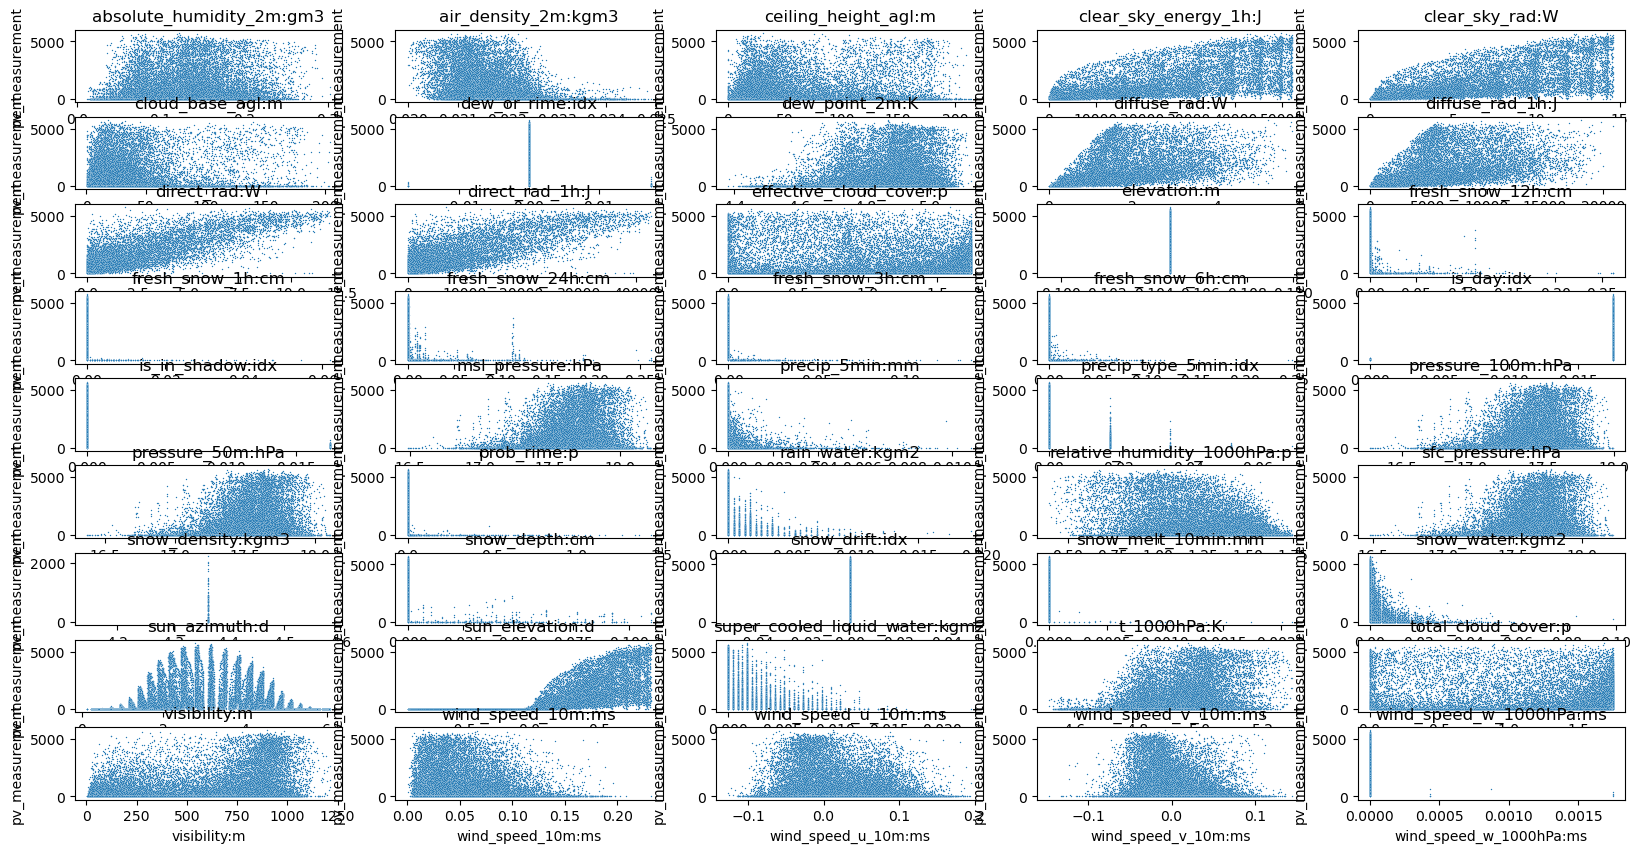

In [284]:
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i in range(45):
    f = X_train_observed_a.columns[i]
    sns.scatterplot(x=(X_train_observed_a[f]*np.pi/180),
                    y=train_a_observed.pv_measurement,
                    s=1, ax=axes[i])

    axes[i].set_title(f"{f}")

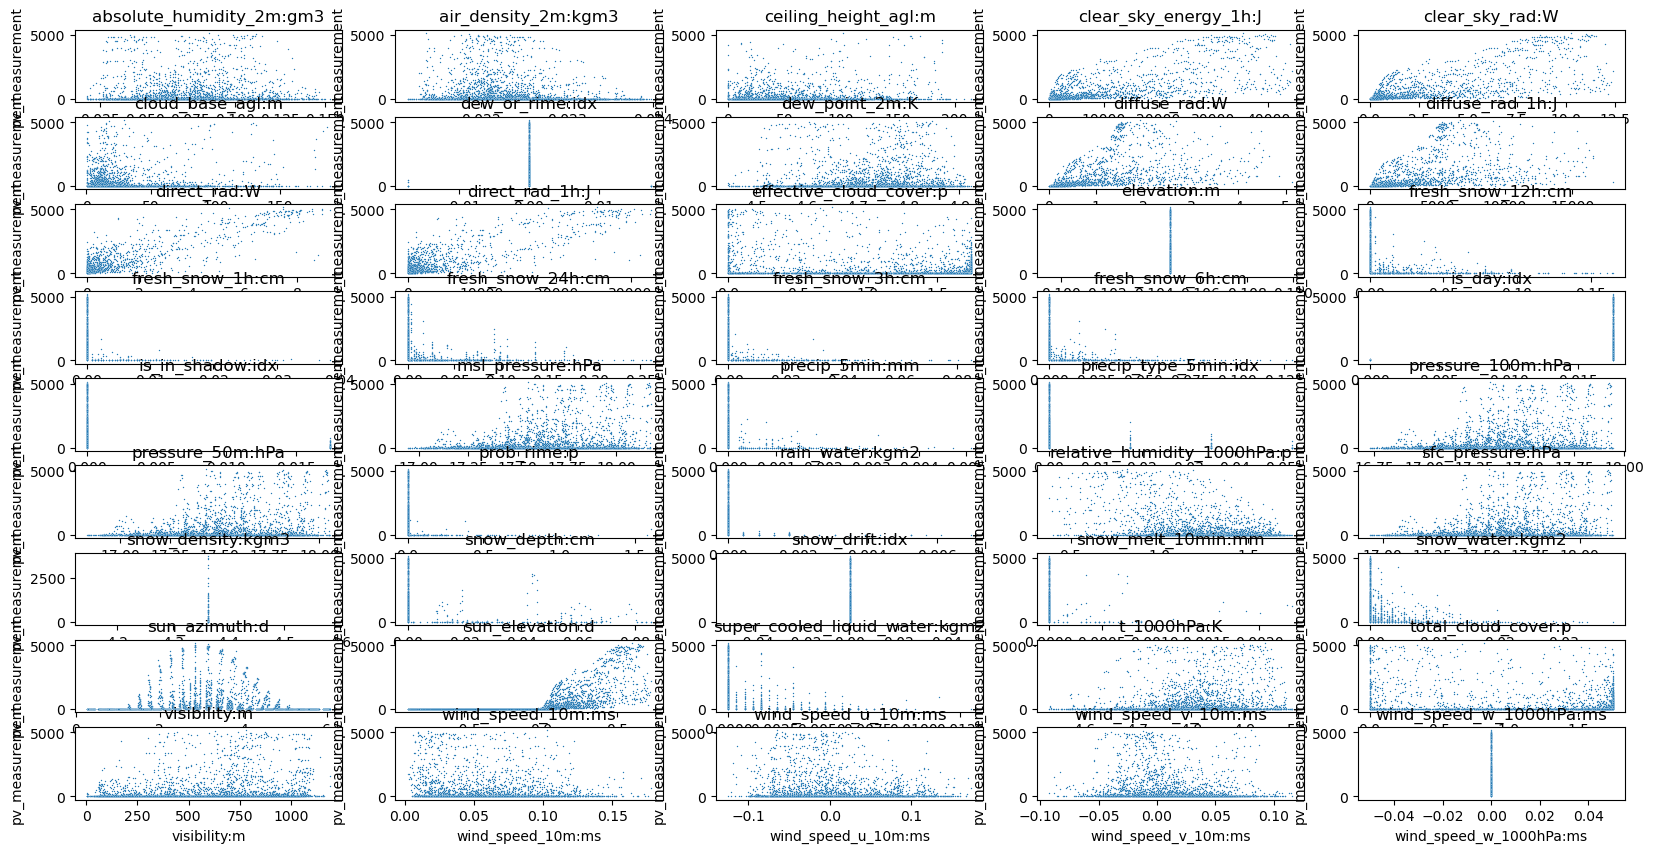

In [286]:
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i in range(45):
    f = X_train_estimated_a.columns[i]
    sns.scatterplot(x=(X_train_estimated_a[f]*np.pi/180),
                    y=train_a_estimated.pv_measurement,
                    s=1, ax=axes[i])

    axes[i].set_title(f"{f}")

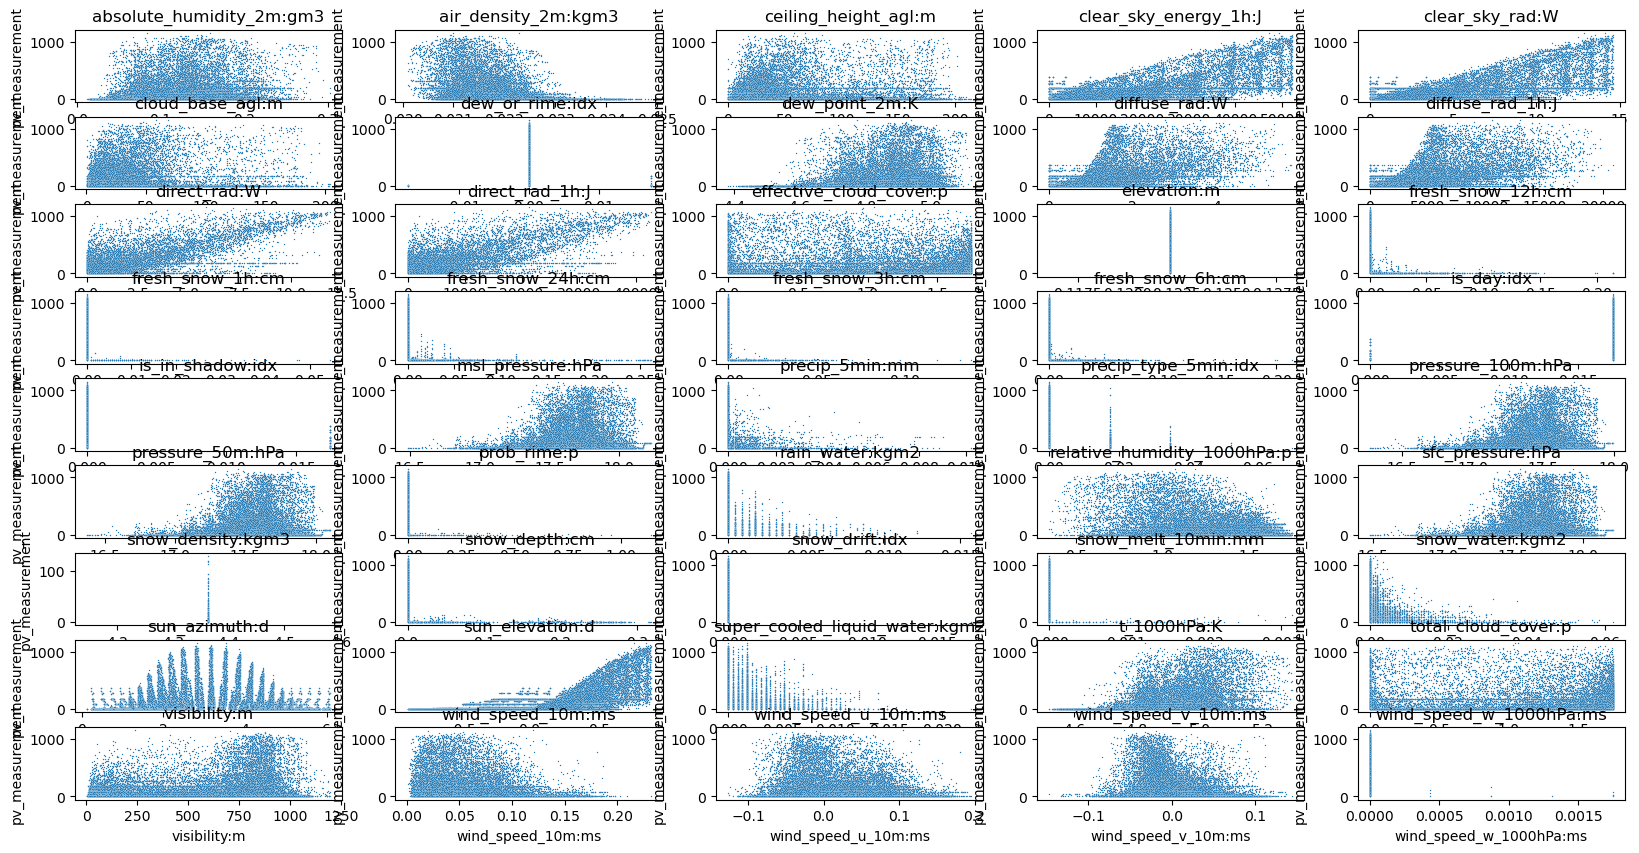

In [285]:
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(20, 10))
axes = axes.flatten()

for i in range(45):
    f = X_train_observed_b.columns[i]
    sns.scatterplot(x=(X_train_observed_b[f]*np.pi/180),
                    y=train_b_observed.pv_measurement,
                    s=1, ax=axes[i])

    axes[i].set_title(f"{f}")

<Axes: xlabel='sun_azimuth:d', ylabel='pv_measurement'>

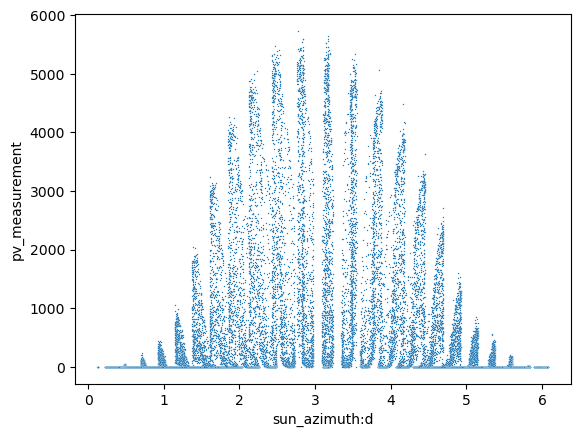

<Axes: >

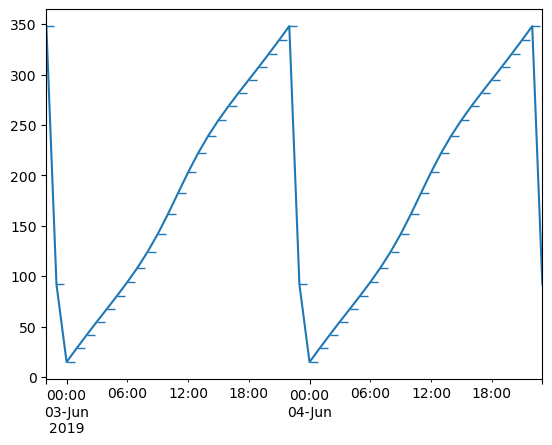

In [17]:
(X_train_observed_a['sun_azimuth:d'])[:50].plot(marker=True)

<Axes: >

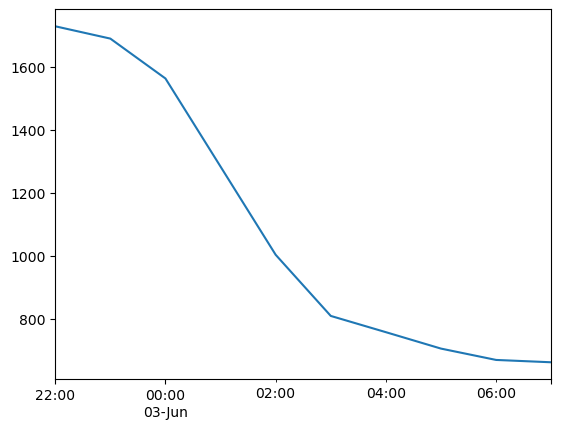

In [26]:
X_train_observed_a.iloc[:10,5].plot()

<Axes: >

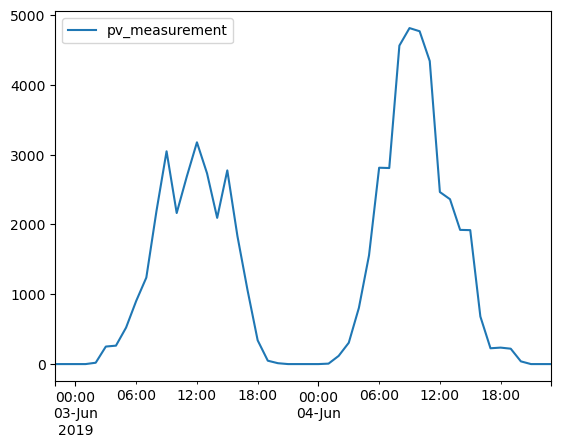

In [49]:
train_a_observed[:50].plot()

([<matplotlib.lines.Line2D at 0x7fb059ee1280>],
 [<matplotlib.lines.Line2D at 0x7fb059f0e910>])

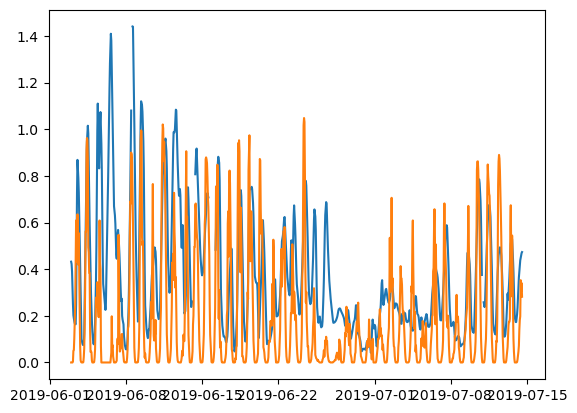

In [68]:
plt.plot(((X_train_observed_a).iloc[:1000,2]/4000)),plt.plot(train_a_observed[:1000]/5000)

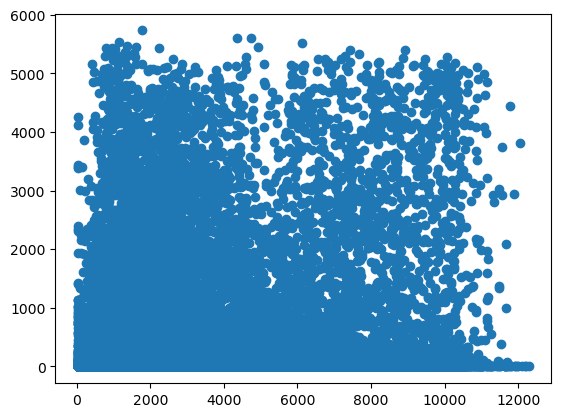

In [66]:
plt.scatter(X_train_observed_a.iloc[:,2],train_a_observed)

<Axes: >

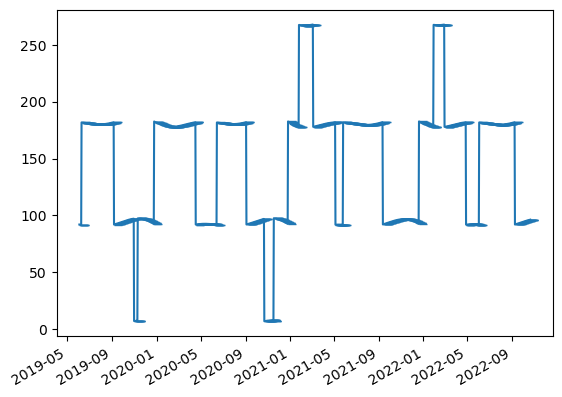

In [112]:
(X_train_observed_a['sun_azimuth:d'])[1::24].plot(marker=True)

<Axes: >

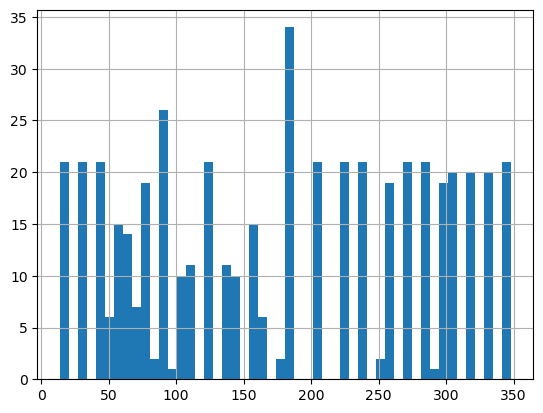

In [102]:
(X_train_observed_a['sun_azimuth:d'])[:500].hist(bins=50)

<Axes: >

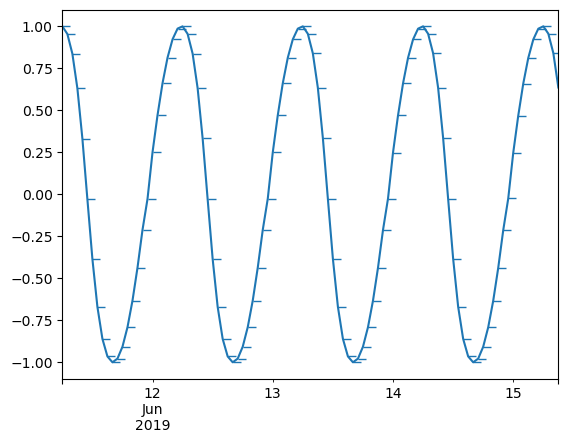

In [98]:
np.sin(X_train_observed_a['sun_azimuth:d']*np.pi/180)[200:300].plot(marker=True)

<Axes: >

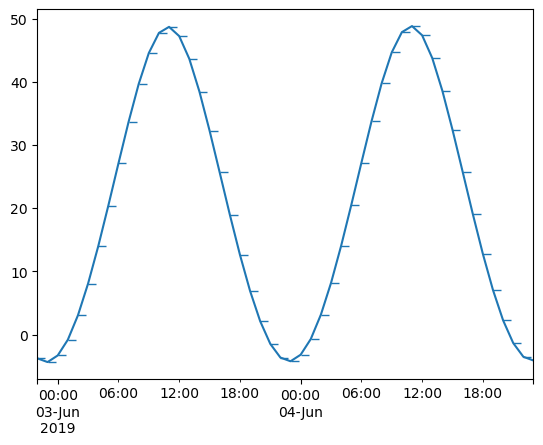

In [99]:
(X_train_observed_a['sun_elevation:d'])[:50].plot(marker=True)

In [17]:
#We change the sun_azimuth variable, because an angle in degree is not really comprehensible for the machine (0 and 360 should be the same)
#therefore, we introduce the sinus and cosinus features
X_train_observed_a['sun_azimuth_cos:'] = np.cos(X_train_observed_a['sun_azimuth:d'])
X_train_observed_a['sun_azimuth_sin:'] = np.sin(X_train_observed_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_cos:'] = np.cos(X_train_estimated_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_sin:'] = np.sin(X_train_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_cos:'] = np.cos(X_test_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_sin:'] = np.sin(X_test_estimated_a['sun_azimuth:d'])
X_train_observed_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)


X_train_observed_b['sun_azimuth_cos:'] = np.cos(X_train_observed_b['sun_azimuth:d'])
X_train_observed_b['sun_azimuth_sin:'] = np.sin(X_train_observed_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_cos:'] = np.cos(X_train_estimated_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_sin:'] = np.sin(X_train_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_cos:'] = np.cos(X_test_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_sin:'] = np.sin(X_test_estimated_b['sun_azimuth:d'])
X_train_observed_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)

X_train_observed_c['sun_azimuth_cos:'] = np.cos(X_train_observed_c['sun_azimuth:d'])
X_train_observed_c['sun_azimuth_sin:'] = np.sin(X_train_observed_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_cos:'] = np.cos(X_train_estimated_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_sin:'] = np.sin(X_train_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_cos:'] = np.cos(X_test_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_sin:'] = np.sin(X_test_estimated_c['sun_azimuth:d'])
X_train_observed_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)

(<Axes: >,)

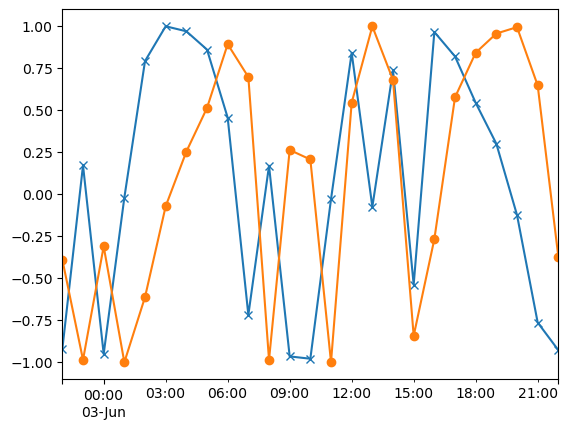

In [18]:
X_train_observed_a['sun_azimuth_cos:'].loc['2019-06-02 22:00:00':'2019-06-03 22:00:00'].plot(marker='x'),
X_train_observed_a['sun_azimuth_sin:'].loc['2019-06-02 22:00:00':'2019-06-03 22:00:00'].plot(marker='o'),

# 3. Missing Value:
- mean or KNN-Imputation

For the missing values, we fill with differents methods such as : 0, mean, KNN-Imputer.

## Mean

In [19]:
X_train_estimated_a.isna().mean().sort_values(ascending=False)[:3]*100

ceiling_height_agl:m    25.967228
cloud_base_agl:m        13.791534
wind_speed_10m:ms        0.000000
dtype: float64

In [20]:
#Missing values
value={'ceiling_height_agl:m' : X_train_estimated_a['ceiling_height_agl:m'].mean(),
       'cloud_base_agl:m' : -999#X_train_estimated_a['cloud_base_agl:m'].mean()
      }

X_train_estimated_a = X_train_estimated_a.fillna(value=value)
X_train_observed_a = X_train_observed_a.fillna(value=value)
X_test_estimated_a = X_test_estimated_a.fillna(value=value)

X_train_estimated_b = X_train_estimated_b.fillna(value=value)
X_train_observed_b = X_train_observed_b.fillna(value=value)
X_test_estimated_b = X_test_estimated_b.fillna(value=value)

X_train_estimated_c = X_train_estimated_c.fillna(value=value)
X_train_observed_c = X_train_observed_c.fillna(value=value)
X_test_estimated_c = X_test_estimated_c.fillna(value=value)

In [21]:
X_train_estimated_a.isna().mean().sort_values(ascending=False)[:3]*100

air_density_2m:kgm3    0.0
wind_speed_10m:ms      0.0
snow_depth:cm          0.0
dtype: float64

<Axes: >

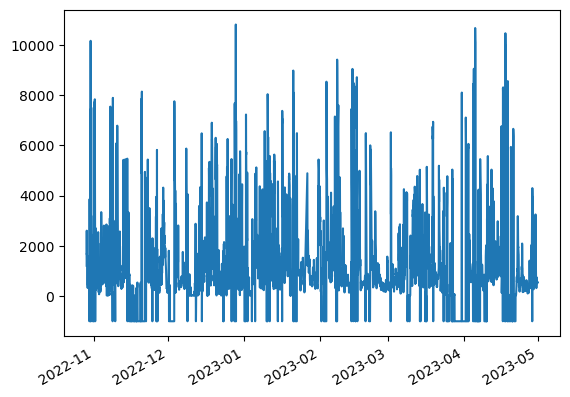

In [22]:
X_train_estimated_a['cloud_base_agl:m'].plot()

# 4. Data transformation:
- Feature: One-hot-encoding for idx and more
- Feature: Apply transformation Box Cox, (log, ^2, 1/,...)
- Y: Apply transformation too!
- Feature: Normalize (MinMax, StandardScaler, Robust)
- X_Estimated: Apply shift between estimated and observed

## one-hot-encoding

We apply _one-hot-encoder_, for categorials features. We saw that 'rain_water:kgm2' is also a categorial feature.

In [23]:
#One Hot encoding 
from sklearn.preprocessing import OneHotEncoder

idx_a = ['dew_or_rime:idx', 'is_in_shadow:idx', 'precip_type_5min:idx', 'rain_water:kgm2']
idx_b_c = ['dew_or_rime:idx', 'is_in_shadow:idx', 'precip_type_5min:idx', 'snow_drift:idx', 'rain_water:kgm2']


for id in idx_a:
    concatenated_df = pd.concat([X_train_observed_a[id], X_train_estimated_a[id], X_test_estimated_a[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_a.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_a.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_a.index]
    
    X_train_observed_a = pd.concat([X_train_observed_a, df_observed_encoded], axis =1)
    X_train_estimated_a = pd.concat([X_train_estimated_a, df_estimated_encoded], axis = 1)
    X_test_estimated_a = pd.concat([X_test_estimated_a, df_test_encoded], axis = 1)
    
    X_train_observed_a.drop([id], inplace = True, axis=1)
    X_train_estimated_a.drop([id], inplace = True, axis=1)
    X_test_estimated_a.drop([id], inplace = True, axis=1)
    
for id in idx_b_c:
    concatenated_df = pd.concat([X_train_observed_b[id], X_train_estimated_b[id], X_test_estimated_b[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_b.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_b.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_b.index]
    
    X_train_observed_b = pd.concat([X_train_observed_b, df_observed_encoded], axis =1)
    X_train_estimated_b = pd.concat([X_train_estimated_b, df_estimated_encoded], axis = 1)
    X_test_estimated_b = pd.concat([X_test_estimated_b, df_test_encoded], axis = 1)
    
    X_train_observed_b.drop([id], inplace = True, axis=1)
    X_train_estimated_b.drop([id], inplace = True, axis=1)
    X_test_estimated_b.drop([id], inplace = True, axis=1)
    
for id in idx_b_c:
    concatenated_df = pd.concat([X_train_observed_c[id], X_train_estimated_c[id], X_test_estimated_c[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_c.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_c.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_c.index]
    
    X_train_observed_c = pd.concat([X_train_observed_c, df_observed_encoded], axis =1)
    X_train_estimated_c = pd.concat([X_train_estimated_c, df_estimated_encoded], axis = 1)
    X_test_estimated_c = pd.concat([X_test_estimated_c, df_test_encoded], axis = 1)
    
    X_train_observed_c.drop([id], inplace = True, axis=1)
    X_train_estimated_c.drop([id], inplace = True, axis=1)
    X_test_estimated_c.drop([id], inplace = True, axis=1)

In [24]:
X_train_observed_a.iloc[:,34:].head()

sun_azimuth_sin:  dew_or_rime:idx_-1.0  \
2019-06-02 22:00:00         -0.389801                 False   
2019-06-02 23:00:00         -0.985375                 False   
2019-06-03 00:00:00         -0.310978                 False   
2019-06-03 01:00:00         -0.999781                 False   
2019-06-03 02:00:00         -0.612414                 False   

                     dew_or_rime:idx_0.0  dew_or_rime:idx_1.0  \
2019-06-02 22:00:00                 True                False   
2019-06-02 23:00:00                 True                False   
2019-06-03 00:00:00                 True                False   
2019-06-03 01:00:00                 True                False   
2019-06-03 02:00:00                 True                False   

                     is_in_shadow:idx_0.0  is_in_shadow:idx_1.0  \
2019-06-02 22:00:00                 False                  True   
2019-06-02 23:00:00                 False                  True   
2019-06-03 00:00:00                 False                  True   
2019-06-03 01:00:00                 False                  True   
2019-06-03 02:00:00                  True                 False   

                     precip_type_5min:idx_0.0  precip_type_5min:idx_1.0  \
2019-06-02 22:00:00                      True                     False   
2019-06-02 23:00:00                      True                     False   
2019-06-03 00:00:00                      True                     False   
2019-06-03 01:00:00                      True                     False   
2019-06-03 02:00:00                      True                     False   

                     precip_type_5min:idx_2.0  precip_type_5min:idx_3.0  \
2019-06-02 22:00:00                     False                     False   
2019-06-02 23:00:00                     False                     False   
2019-06-03 00:00:00                     False                     False   
2019-06-03 01:00:00                     False                     False   
2019-06-03 02:00:00                     False                     False   

                     precip_type_5min:idx_5.0  precip_type_5min:idx_6.0  \
2019-06-02 22:00:00                     False                     False   
2019-06-02 23:00:00                     False                     False   
2019-06-03 00:00:00                     False                     False   
2019-06-03 01:00:00                     False                     False   
2019-06-03 02:00:00                     False                     False   

                     rain_water:kgm2_0.0  rain_water:kgm2_0.10000000149011612  \
2019-06-02 22:00:00                 True                                False   
2019-06-02 23:00:00                 True                                False   
2019-06-03 00:00:00                False                                 True   
2019-06-03 01:00:00                False                                False   
2019-06-03 02:00:00                False                                 True   

                     rain_water:kgm2_0.20000000298023224  \
2019-06-02 22:00:00                                False   
2019-06-02 23:00:00                                False   
2019-06-03 00:00:00                                False   
2019-06-03 01:00:00                                 True   
2019-06-03 02:00:00                                False   

                     rain_water:kgm2_0.30000001192092896  \
2019-06-02 22:00:00                                False   
2019-06-02 23:00:00                                False   
2019-06-03 00:00:00                                False   
2019-06-03 01:00:00                                False   
2019-06-03 02:00:00                                False   

                     rain_water:kgm2_0.4000000059604645  rain_water:kgm2_0.5  \
2019-06-02 22:00:00                               False                False   
2019-06-02 23:00:00                               False                False   
2019-06-03 00:00:00                           

## Apply transformation Box Cox, (log, ^2, 1/,...)
- Y: Apply transformation too!

In [25]:
X_new = X_test_estimated_a

def normalize(feature):
    return (feature - feature.min())/(feature.max()-feature.min())

mean 40.86639 30.28501 65.68202 21.600132 72.996254 72.03529
var f:1358.439453125, f2:1212.5355224609375, logf:1423.6041259765625, f_1:1600.267333984375, logfc:1441.0050048828125, loglogf:1463.65869140625


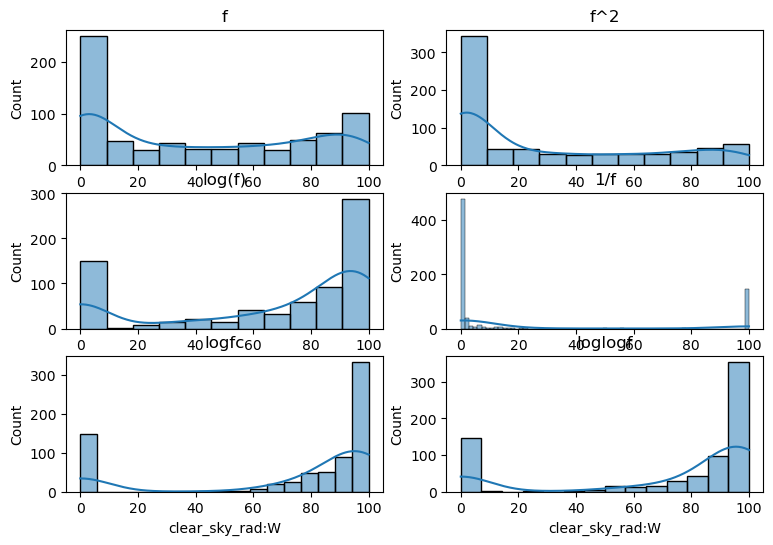

In [26]:
import seaborn as sns

i = 2
token = True

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 6))
axes = axes.flatten()
feature = X_new.iloc[:,i]#.resample('M').mean()

f = normalize(feature)*100
sns.histplot(data=f, ax=axes[0], kde=True)
axes[0].set_title("f")

f2 = normalize((feature)**2)*100
sns.histplot(data=f2, ax=axes[1], kde=True)
axes[1].set_title("f^2")

logf = normalize(np.log(feature+1))*100
sns.histplot(data=logf, ax=axes[2], kde=True)
axes[2].set_title("log(f)")

if token:
    f_1 = normalize(1/(feature+1))*100
    sns.histplot(data=f_1, ax=axes[3], kde=True)
    axes[3].set_title("1/f")


c = (feature.quantile(.25)/feature.quantile(.75))**2
logfc = normalize(np.log(feature+c))*100
sns.histplot(data=logfc, ax=axes[4], kde=True)
axes[4].set_title("logfc")

loglogf = normalize(np.log(np.log(feature+1)+1))*100
sns.histplot(data=loglogf, ax=axes[5], kde=True)
axes[5].set_title("loglogf")


print('mean',f.mean(),np.mean(f2), np.mean(logf), np.mean(f_1), np.mean(logfc), np.mean(loglogf))
print(f'var f:{np.var(f)}, f2:{np.var(f2)}, logf:{np.var(logf)}, f_1:{np.var(f_1)}, logfc:{np.var(logfc)}, loglogf:{np.var(loglogf)}')

In [27]:
transformations = [['absolute_humidity_2m:gm3', 'f'],
 ['air_density_2m:kgm3', '1/f'],
 ['ceiling_height_agl:m', 'f'],
 ['clear_sky_rad:W', 'f'],
 ['cloud_base_agl:m', 'logfc'],
 ['dew_or_rime:idx', 'hot'],
 ['effective_cloud_cover:p', 'f^2'],
 ['elevation:m', 'constant'],
 ['fresh_snow_12h:cm', 'loglogf ou rien'],
 ['fresh_snow_1h:cm', 'loglogf ou rien'],
 ['fresh_snow_24h:cm', 'loglogf ou rien'],
 ['fresh_snow_3h:cm', 'loglogf ou rien'],
 ['fresh_snow_6h:cm', 'loglogf ou rien'],
 ['is_day:idx', 'hot'],
 ['is_in_shadow:idx', 'hot'],
 ['precip_5min:mm', 'loglogf ou rien'],
 ['precip_type_5min:idx', 'hot'],
 ['pressure_100m:hPa', 'rien'],
 ['prob_rime:p', 'loglogf ou rien'],
 ['rain_water:kgm2', 'one hot à faire !'],
 ['relative_humidity_1000hPa:p', ''],
 ['snow_density:kgm3', 'constant'],
 ['snow_depth:cm', 'loglogf ou rien'],
 ['snow_drift:idx', 'hot'],
 ['snow_melt_10min:mm', 'loglogf ou rien'],
 ['snow_water:kgm2', 'loglogf ou rien'],
 ['sun_azimuth:d', 'f ou f^2'],
 ['sun_elevation:d', 'f ou f^2'],
 ['super_cooled_liquid_water:kgm2', 'loglogf ou rien'],
 ['t_1000hPa:K', 'f^2'],
 ['total_cloud_cover:p', 'f^2 ou rien'],
 ['visibility:m', 'f'],
 ['wind_speed_10m:ms', 'f ou logfc'],
 ['wind_speed_u_10m:ms', 'f ou logfc'],
 ['wind_speed_v_10m:ms', 'f'],
 ['wind_speed_w_1000hPa:ms', 'hot']]

In [28]:
'wind_speed_w_1000hPa:ms' in X_test_estimated_a.columns

True

In [29]:
for X in [X_train_estimated_a, X_train_observed_a, X_test_estimated_a,
         X_train_estimated_b, X_train_observed_b, X_test_estimated_b,
         X_train_estimated_c, X_train_observed_c, X_test_estimated_c]: 
    for feature, function in transformations:
        if feature in X.columns:
            if function == '1/f':
                X[feature] = 1/(X[feature]+1)
            if function == 'logfc':
                X[feature] = np.log(X[feature] + (X[feature].quantile(.25)/X[feature].quantile(.75))**2 )
            if function == 'f^2':
                X[feature] = (X[feature])**2
            if function == 'logf':
                X[feature] = np.log(X[feature]+1)
            if function == 'loglogf':
                X[feature] = np.log(np.log(X[feature]+1)+1)

/Applications/anaconda3/envs/tdt4173/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Applications/anaconda3/envs/tdt4173/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Applications/anaconda3/envs/tdt4173/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Applications/anaconda3/envs/tdt4173/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Applications/anaconda3/envs/tdt4173/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Applications/a

array([[<Axes: title={'center': 'air_density_2m:kgm3'}>,
        <Axes: title={'center': 'ceiling_height_agl:m'}>,
        <Axes: title={'center': 'clear_sky_rad:W'}>,
        <Axes: title={'center': 'cloud_base_agl:m'}>,
        <Axes: title={'center': 'dew_point_2m:K'}>,
        <Axes: title={'center': 'diffuse_rad:W'}>],
       [<Axes: title={'center': 'direct_rad:W'}>,
        <Axes: title={'center': 'effective_cloud_cover:p'}>,
        <Axes: title={'center': 'fresh_snow_12h:cm'}>,
        <Axes: title={'center': 'fresh_snow_1h:cm'}>,
        <Axes: title={'center': 'fresh_snow_24h:cm'}>,
        <Axes: title={'center': 'fresh_snow_3h:cm'}>],
       [<Axes: title={'center': 'fresh_snow_6h:cm'}>,
        <Axes: title={'center': 'is_day:idx'}>,
        <Axes: title={'center': 'msl_pressure:hPa'}>,
        <Axes: title={'center': 'precip_5min:mm'}>,
        <Axes: title={'center': 'prob_rime:p'}>,
        <Axes: title={'center': 'relative_humidity_1000hPa:p'}>],
       [<Axes: title=

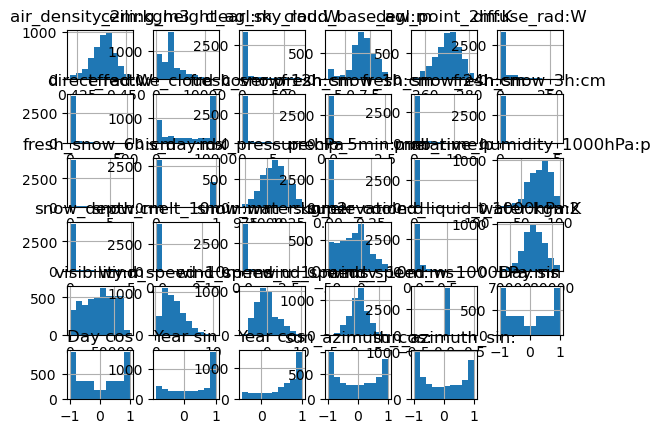

In [30]:
X_train_estimated_a.iloc[:,:].hist()

Transformation on y

Text(0.5, 1.0, 'log y>0')

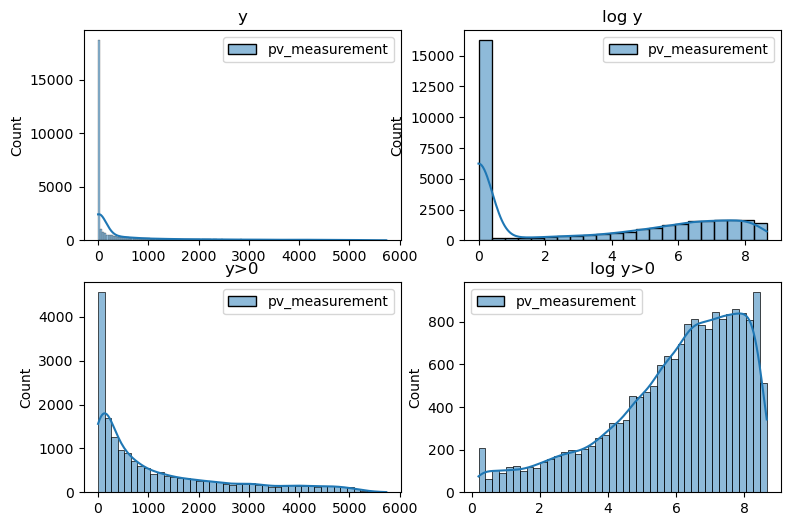

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
axes = axes.flatten()

sns.histplot(data=train_a, ax=axes[0], kde=True)
axes[0].set_title("y")

sns.histplot(data=(np.log(train_a + 1)), ax=axes[1], kde=True)
axes[1].set_title("log y")

sns.histplot(data=train_a[train_a>0], ax=axes[2], kde=True)
axes[2].set_title("y>0")

sns.histplot(data=(np.log(train_a[train_a>0] + 1)), ax=axes[3], kde=True)
axes[3].set_title("log y>0")

## Normalize (MinMax, StandardScaler, Robust)


In [32]:
col = []
for X in [X_train_estimated_a, X_train_observed_a, X_test_estimated_a,
         X_train_estimated_b, X_train_observed_b, X_test_estimated_b,
         X_train_estimated_c, X_train_observed_c, X_test_estimated_c]:
    col.append(X.columns)
    
id_ = []
for X in [X_train_estimated_a, X_train_observed_a, X_test_estimated_a,
         X_train_estimated_b, X_train_observed_b, X_test_estimated_b,
         X_train_estimated_c, X_train_observed_c, X_test_estimated_c]:
    id_.append(X.index)

In [33]:
#Normalisation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_train_estimated_a = scaler.fit_transform(X_train_estimated_a)
X_train_observed_a = scaler.fit_transform(X_train_observed_a)
X_test_estimated_a = scaler.fit_transform(X_test_estimated_a)

X_train_estimated_b = scaler.fit_transform(X_train_estimated_b)
X_train_observed_b = scaler.fit_transform(X_train_observed_b)
X_test_estimated_b = scaler.fit_transform(X_test_estimated_b)

X_train_estimated_c = scaler.fit_transform(X_train_estimated_c)
X_train_observed_c = scaler.fit_transform(X_train_observed_c)
X_test_estimated_c = scaler.fit_transform(X_test_estimated_c)

In [34]:
X_train_estimated_a = pd.DataFrame(X_train_estimated_a, columns=col[0], index=id_[0])
X_train_observed_a = pd.DataFrame(X_train_observed_a, columns=col[1], index=id_[1])
X_test_estimated_a = pd.DataFrame(X_test_estimated_a, columns=col[2], index=id_[2])

X_train_estimated_b = pd.DataFrame(X_train_estimated_b, columns=col[3], index=id_[3])
X_train_observed_b = pd.DataFrame(X_train_observed_b, columns=col[4], index=id_[4])
X_test_estimated_b = pd.DataFrame(X_test_estimated_b, columns=col[5], index=id_[5])

X_train_estimated_c = pd.DataFrame(X_train_estimated_c, columns=col[6], index=id_[6])
X_train_observed_c = pd.DataFrame(X_train_observed_c, columns=col[7], index=id_[7])
X_test_estimated_c = pd.DataFrame(X_test_estimated_c, columns=col[8], index=id_[8])

In [35]:
X_train_estimated_a.max().sort_values(ascending=True)[:10]

wind_speed_w_1000hPa:ms               0.0
rain_water:kgm2_0.8999999761581421    0.0
rain_water:kgm2_0.699999988079071     0.0
rain_water:kgm2_0.6000000238418579    0.0
rain_water:kgm2_0.5                   0.0
precip_type_5min:idx_6.0              0.0
precip_type_5min:idx_5.0              0.0
rain_water:kgm2_1.0                   0.0
rain_water:kgm2_1.399999976158142     0.0
wind_speed_10m:ms                     1.0
dtype: float64

## X_Estimated: Apply shift between estimated and observed

(0.23552274958107894, 0.25934261405682124)

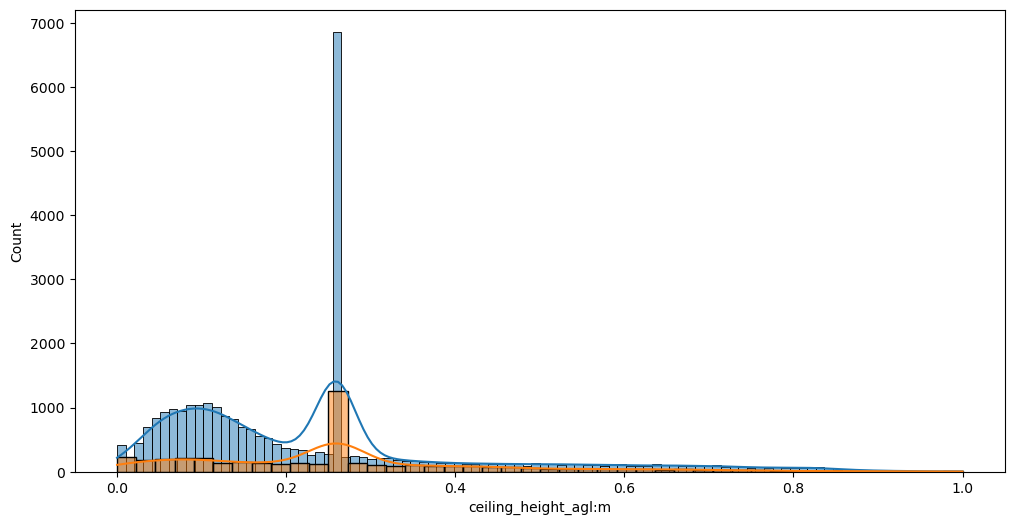

In [36]:
i = 1

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

#sns.histplot(data=X_train_observed_a_est.loc[A_index21_est].iloc[:,i], kde=True)
sns.histplot(data=X_train_observed_a.iloc[:,i], kde=True)
sns.histplot(data=X_train_estimated_a.iloc[:,i], kde=True)

X_train_observed_a.iloc[:,i].mean(), X_train_estimated_a.iloc[:,i].mean(), 

We create a function SHIFT, in order to have the same expected value and SD between observed and estimate for the same time-period (like spring).

In [37]:
def shift(X_obs, X_est):
    mu_obs, sd_obs = X_obs.mean(), np.sqrt(X_obs.var())
    mu_est, sd_est = X_est.mean(), np.sqrt(X_est.var())
    if sd_est>0:
        X_est = (X_est - mu_est) / sd_est
        X_est = (X_est * sd_obs) + mu_obs
        return X_est
    else:
        return X_est

We select lines from X_observed value for a specific time-period.

## SHIFT

### Test Estimated SHIFT Train Observed

In [38]:
X_test_estimated_a.index

DatetimeIndex(['2023-05-01 00:00:00', '2023-05-01 01:00:00',
               '2023-05-01 02:00:00', '2023-05-01 03:00:00',
               '2023-05-01 04:00:00', '2023-05-01 05:00:00',
               '2023-05-01 06:00:00', '2023-05-01 07:00:00',
               '2023-05-01 08:00:00', '2023-05-01 09:00:00',
               ...
               '2023-07-03 14:00:00', '2023-07-03 15:00:00',
               '2023-07-03 16:00:00', '2023-07-03 17:00:00',
               '2023-07-03 18:00:00', '2023-07-03 19:00:00',
               '2023-07-03 20:00:00', '2023-07-03 21:00:00',
               '2023-07-03 22:00:00', '2023-07-03 23:00:00'],
              dtype='datetime64[us]', name='date_forecast', length=720, freq=None)

In [39]:
A_index19 = X_train_observed_a.loc['2019-05-01 00:00:00':'2019-07-03 23:45:00'].index
A_index20 = X_train_observed_a.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
A_index21 = X_train_observed_a.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index
A_index22 = X_train_observed_a.loc['2022-05-01 00:00:00':'2022-07-03 23:45:00'].index

B_index19 = X_train_observed_b.loc['2019-05-01 00:00:00':'2019-07-03 23:45:00'].index
B_index20 = X_train_observed_b.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
B_index21 = X_train_observed_b.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index
#B_index22 = X_train_observed_b.loc['2022-05-01 00:00:00':'2022-07-03 23:45:00'].index

#C_index19 = X_train_observed_c.loc['2019-05-01 00:00:00':'2019-07-03 23:45:00'].index
C_index20 = X_train_observed_c.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
C_index21 = X_train_observed_c.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index
#C_index22 = X_train_observed_c.loc['2022-05-01 00:00:00':'2022-07-03 23:45:00'].index

Problem : the first spring in 2019 for A is half empty.

In [40]:
len(C_index20),len(C_index21)

(1536, 1536)

In [41]:
len(A_index19),len(A_index20), len(B_index19)

(746, 1536, 1536)

In [42]:
A_index_spring = A_index20.union(A_index21).union(A_index22)
B_index_spring = B_index19.union(B_index20).union(B_index21)#.union(B_index22)
C_index_spring = C_index20.union(C_index21) #C_index19.union(C_index20).union(C_index21).union(C_index22)

In [43]:
X_train_observed_a_sping = X_train_observed_a.loc[A_index_spring]
X_train_observed_b_sping = X_train_observed_b.loc[B_index_spring]
X_train_observed_c_sping = X_train_observed_c.loc[C_index_spring]

<Axes: >

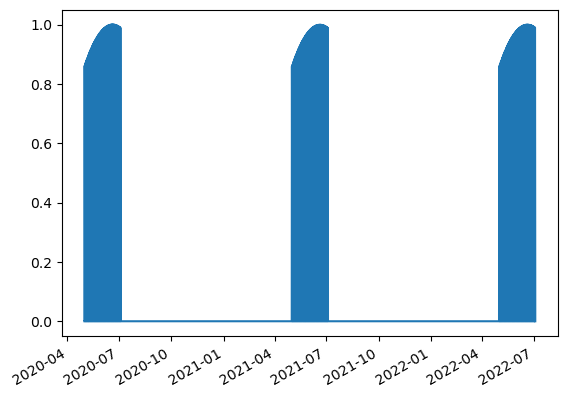

In [44]:
X_train_observed_a_sping.iloc[:,2].plot()

In [45]:
for i in range(X_test_estimated_a.shape[1]):
    X_obs, X_est = X_train_observed_a_sping.iloc[:,i], X_test_estimated_a.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_test_estimated_a.iloc[:,i] = X_est_new
    
for i in range(X_test_estimated_b.shape[1]):
    X_obs, X_est = X_train_observed_b_sping.iloc[:,i], X_test_estimated_b.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_test_estimated_b.iloc[:,i] = X_est_new
    
for i in range(X_test_estimated_c.shape[1]):
    X_obs, X_est = X_train_observed_c_sping.iloc[:,i], X_test_estimated_c.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_test_estimated_c.iloc[:,i] = X_est_new

MEAN  X_obs_spring 0.6722724347059863       X_test_shift 0.6722724347059863
VAR X_obs_spring 0.010384350050819398       X_test_shift 0.010384350050819436


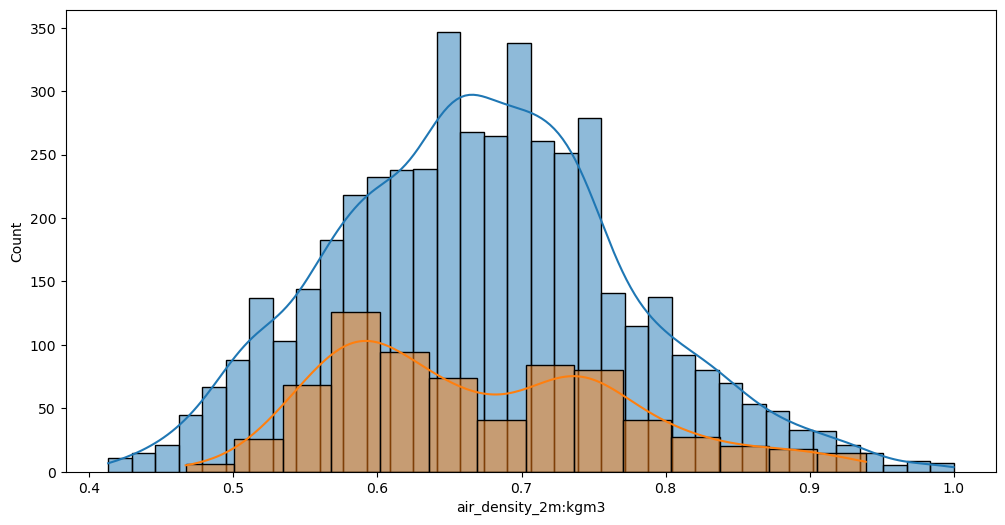

In [46]:
i = 0

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

sns.histplot(data=X_train_observed_a_sping.iloc[:,i], kde=True)
sns.histplot(data=X_test_estimated_a.iloc[:,i], kde=True)

print(f'MEAN  X_obs_spring {X_train_observed_a_sping.iloc[:,i].mean()} \
      X_test_shift {X_test_estimated_a.iloc[:,i].mean()}')

print(f'VAR X_obs_spring {X_train_observed_a_sping.iloc[:,i].var()} \
      X_test_shift {X_test_estimated_a.iloc[:,i].var()}')

### Train Estimated SHIFT Train Observed

Same thing for X_train_estimated.

In [47]:
X_train_estimated_a.index

DatetimeIndex(['2022-10-28 22:00:00', '2022-10-28 23:00:00',
               '2022-10-29 00:00:00', '2022-10-29 01:00:00',
               '2022-10-29 02:00:00', '2022-10-29 03:00:00',
               '2022-10-29 04:00:00', '2022-10-29 05:00:00',
               '2022-10-29 06:00:00', '2022-10-29 07:00:00',
               ...
               '2023-04-30 14:00:00', '2023-04-30 15:00:00',
               '2023-04-30 16:00:00', '2023-04-30 17:00:00',
               '2023-04-30 18:00:00', '2023-04-30 19:00:00',
               '2023-04-30 20:00:00', '2023-04-30 21:00:00',
               '2023-04-30 22:00:00', '2023-04-30 23:00:00'],
              dtype='datetime64[us]', length=4394, freq=None)

In [48]:
A_index19_est = X_train_observed_a.loc['2019-10-28 22:00:00':'2020-04-30 23:00:00'].index
A_index20_est = X_train_observed_a.loc['2020-10-28 22:00:00':'2021-04-30 23:00:00'].index
A_index21_est = X_train_observed_a.loc['2021-10-28 22:00:00':'2022-04-30 23:00:00'].index

B_index19_est = X_train_observed_b.loc['2019-10-28 22:00:00':'2020-04-30 23:00:00'].index
B_index20_est = X_train_observed_b.loc['2020-10-28 22:00:00':'2021-04-30 23:00:00'].index
B_index21_est = X_train_observed_b.loc['2021-10-28 22:00:00':'2022-04-30 23:00:00'].index

C_index19_est = X_train_observed_c.loc['2019-10-28 22:00:00':'2020-04-30 23:00:00'].index
C_index20_est = X_train_observed_c.loc['2020-10-28 22:00:00':'2021-04-30 23:00:00'].index
C_index21_est = X_train_observed_c.loc['2021-10-28 22:00:00':'2022-04-30 23:00:00'].index

In [49]:
len(C_index19_est),len(C_index20_est), len(C_index21_est)

(4442, 4418, 4293)

In [50]:
A_index20_est

DatetimeIndex(['2020-10-28 22:00:00', '2020-10-28 23:00:00',
               '2020-10-29 00:00:00', '2020-10-29 01:00:00',
               '2020-10-29 02:00:00', '2020-10-29 03:00:00',
               '2020-10-29 04:00:00', '2020-10-29 05:00:00',
               '2020-10-29 06:00:00', '2020-10-29 07:00:00',
               ...
               '2021-04-30 14:00:00', '2021-04-30 15:00:00',
               '2021-04-30 16:00:00', '2021-04-30 17:00:00',
               '2021-04-30 18:00:00', '2021-04-30 19:00:00',
               '2021-04-30 20:00:00', '2021-04-30 21:00:00',
               '2021-04-30 22:00:00', '2021-04-30 23:00:00'],
              dtype='datetime64[us]', length=4418, freq=None)

In [51]:
A_index_est = A_index19_est.union(A_index20_est).union(A_index21_est)
B_index_est = B_index19_est.union(B_index20_est).union(B_index21_est)
C_index_est = C_index19_est.union(C_index20_est).union(C_index21_est)

In [52]:
X_train_observed_a_est = X_train_observed_a.loc[A_index_est]
X_train_observed_b_est = X_train_observed_b.loc[B_index_est]
X_train_observed_c_est = X_train_observed_c.loc[C_index_est]

<Axes: >

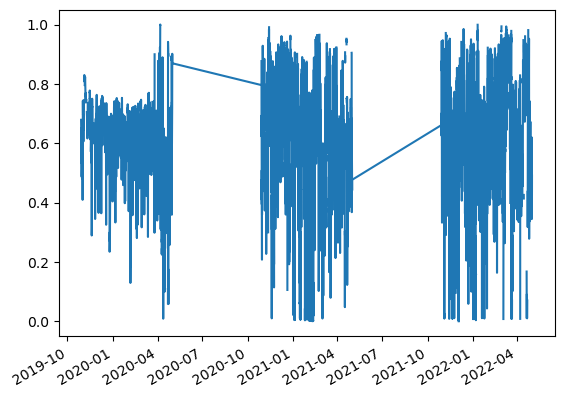

In [53]:
X_train_observed_a_est.iloc[:,3].plot()

In [54]:
for i in range(X_train_estimated_a.shape[1]):
    X_obs, X_est = X_train_observed_a_est.iloc[:,i], X_train_estimated_a.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_train_estimated_a.iloc[:,i] = X_est_new
    
for i in range(X_train_estimated_b.shape[1]):
    X_obs, X_est = X_train_observed_b_est.iloc[:,i], X_train_estimated_b.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_train_estimated_b.iloc[:,i] = X_est_new
    
for i in range(X_train_estimated_c.shape[1]):
    X_obs, X_est = X_train_observed_b_est.iloc[:,i], X_train_estimated_c.iloc[:,i]
    X_est_new = shift(X_obs, X_est)
    X_train_estimated_c.iloc[:,i] = X_est_new

MEAN  X_obs_est 0.5100112545821068       X_train_est_shift 0.5100112545821068
VAR X_obs_est 0.011914159600729234       X_train_est_shift 0.011914159600729318


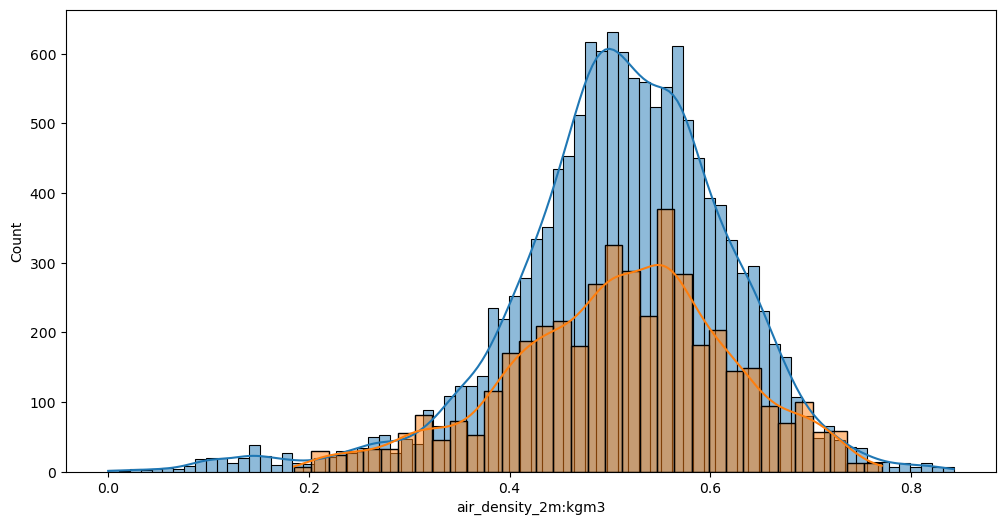

In [55]:
i = 0

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

sns.histplot(data=X_train_observed_a_est.iloc[:,i], kde=True)
sns.histplot(data=X_train_estimated_a.iloc[:,i], kde=True)

print(f'MEAN  X_obs_est {X_train_observed_a_est.iloc[:,i].mean()} \
      X_train_est_shift {X_train_estimated_a.iloc[:,i].mean()}')

print(f'VAR X_obs_est {X_train_observed_a_est.iloc[:,i].var()} \
      X_train_est_shift {X_train_estimated_a.iloc[:,i].var()}')

# 5. ImBalance Data (too much zero to forecast)
- Build 2 models, one binary classification, and another one for y>0 prediction

We create train_S_estimated_binary, train_S_observed_binary which indicates if y>0 of not.

In [56]:
max_a = max(train_a_estimated['pv_measurement'])
train_a_estimated['pv_measurement'] = train_a_estimated['pv_measurement']/max_a

max_b = max(train_b_estimated['pv_measurement'])
train_b_estimated['pv_measurement'] = train_b_estimated['pv_measurement']/max_b

max_c = max(train_c_estimated['pv_measurement'])
train_c_estimated['pv_measurement'] = train_c_estimated['pv_measurement']/max_c

In [71]:
train_a_observed['pv_measurement'] = train_a_observed['pv_measurement']/max_a

train_b_observed['pv_measurement'] = train_b_observed['pv_measurement']/max_b

train_c_observed['pv_measurement'] = train_c_observed['pv_measurement']/max_c

In [60]:
# We modify Y to have a binary classification : 0 = no production of electricity
train_a_estimated_binary = pd.DataFrame({'pv_measurement' : train_a_estimated['pv_measurement']})
train_a_observed_binary = pd.DataFrame({'pv_measurement' : train_a_observed['pv_measurement']})

train_b_estimated_binary = pd.DataFrame({'pv_measurement' : train_b_estimated['pv_measurement']})
train_b_observed_binary = pd.DataFrame({'pv_measurement' : train_b_observed['pv_measurement']})

train_c_estimated_binary = pd.DataFrame({'pv_measurement' : train_c_estimated['pv_measurement']})
train_c_observed_binary = pd.DataFrame({'pv_measurement' : train_c_observed['pv_measurement']})

for time in train_a_estimated_binary.index:
    if train_a_estimated_binary.loc[time]['pv_measurement'] > 0 :
        train_a_estimated_binary.loc[time] = 1

for time in train_a_observed_binary.index:
    if train_a_observed_binary.loc[time]['pv_measurement'] > 0 :
        train_a_observed_binary.loc[time] = 1  
        
for time in train_b_estimated_binary.index:
    if train_b_estimated_binary.loc[time]['pv_measurement'] > 0 :
        train_b_estimated_binary.loc[time] = 1

for time in train_b_observed_binary.index:
    if train_b_observed_binary.loc[time]['pv_measurement'] > 0 :
        train_b_observed_binary.loc[time] = 1 
        
for time in train_c_estimated_binary.index:
    if train_c_estimated_binary.loc[time]['pv_measurement'] > 0 :
        train_c_estimated_binary.loc[time] = 1

for time in train_c_observed_binary.index:
    if train_c_observed_binary.loc[time]['pv_measurement'] > 0 :
        train_c_observed_binary.loc[time] = 1 

<Axes: >

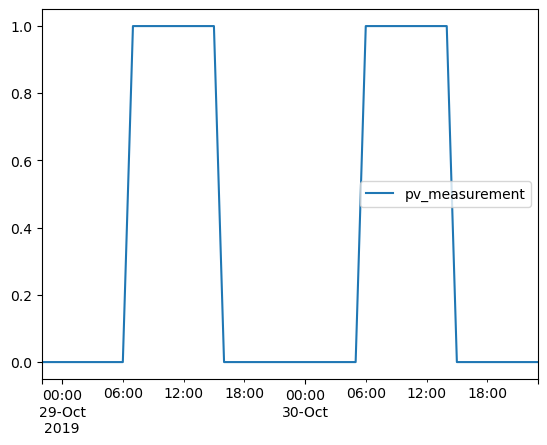

In [244]:
train_a_observed_binary.loc['2019-10-28 22:00:00':'2019-10-30 23:00:00'].plot()

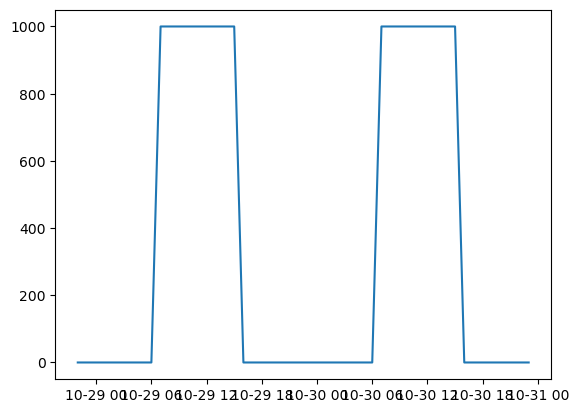

In [54]:
plt.plot(X_train_observed_a['is_day:idx'].loc['2019-10-28 22:00:00':'2019-10-30 23:00:00']*1000, label='Binary y')

In [61]:
#Missing values
value={'ceiling_height_agl:m' : X_train_estimated_a['ceiling_height_agl:m'].mean(),
       'cloud_base_agl:m' : -999#X_train_estimated_a['cloud_base_agl:m'].mean()
      }

X_train_estimated_a = X_train_estimated_a.fillna(value=value)
X_train_observed_a = X_train_observed_a.fillna(value=value)
X_test_estimated_a = X_test_estimated_a.fillna(value=value)

X_train_estimated_b = X_train_estimated_b.fillna(value=value)
X_train_observed_b = X_train_observed_b.fillna(value=value)
X_test_estimated_b = X_test_estimated_b.fillna(value=value)

X_train_estimated_c = X_train_estimated_c.fillna(value=value)
X_train_observed_c = X_train_observed_c.fillna(value=value)
X_test_estimated_c = X_test_estimated_c.fillna(value=value)

### Test Binary Classification

In [108]:
((X_train_estimated_b_matched['is_day:idx_1.0']==0) == (train_b_estimated_matched>0)['pv_measurement'].values.reshape((3601,))).mean()*100

4.332129963898916

In [109]:
((X_train_observed_c_matched['is_day:idx_1.0']==0) == (train_c_observed_matched>0)['pv_measurement'].values.reshape((23141,))).mean()*100

9.36865304005877

In [110]:
((X_train_estimated_c_matched['is_day:idx_1.0']==0) == (train_c_estimated_matched>0)['pv_measurement'].values.reshape((2930,))).mean()*100

7.8839590443686

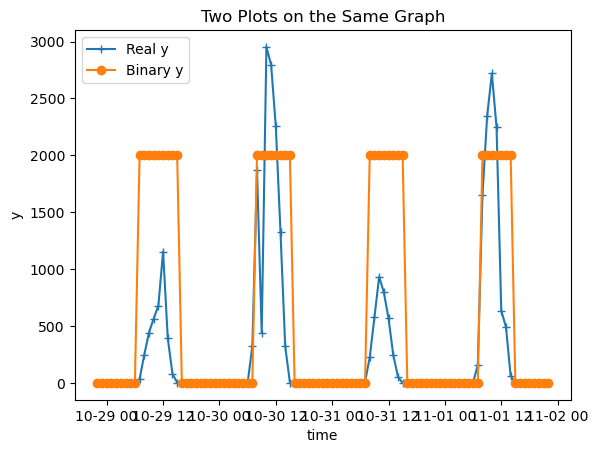

In [70]:
plt.plot(train_a_estimated_matched['pv_measurement'].loc['2022-10-28 22:00:00':'2022-11-01 22:00:0'], label='Real y', marker ='+')
#plt.plot(train_a_estimated_binary.loc['2022-10-28 22:00:00':'2022-11-01 22:00:0']*1000, label='Binary y')
plt.plot( (X_train_estimated_a_matched['is_day:idx_1.0'].loc['2022-10-28 22:00:00':'2022-11-01 22:00:0'])*2000 , label='Binary y',marker='o')

# Customize the plot (add labels, legend, title, etc. as needed)
plt.xlabel('time')
plt.ylabel('y')
plt.title('Two Plots on the Same Graph')
plt.legend()
plt.show()

In [825]:
train_a_total_binary = pd.concat([train_a_observed_binary, train_a_estimated_binary], axis = 0)
y_total_a = train_a_total_binary.to_numpy().ravel()
train_b_total_binary = pd.concat([train_b_observed_binary, train_b_estimated_binary], axis = 0)
y_total_b = train_b_total_binary.to_numpy().ravel()
train_c_total_binary = pd.concat([train_c_observed_binary, train_c_estimated_binary], axis = 0)
y_total_c = train_c_total_binary.to_numpy().ravel()

y_observed_a_binary = train_a_observed_binary.to_numpy().ravel()
y_observed_b_binary = train_b_observed_binary.to_numpy().ravel()
y_observed_c_binary = train_c_observed_binary.to_numpy().ravel()

y_estimated_a_binary = train_a_estimated_binary.to_numpy().ravel()
y_estimated_b_binary = train_b_estimated_binary.to_numpy().ravel()
y_estimated_c_binary = train_c_estimated_binary.to_numpy().ravel()

X_train_total_a = np.concatenate((X_train_observed_a_scaled, X_train_estimated_a_scaled), axis = 0)
X_train_total_b = np.concatenate((X_train_observed_b_scaled, X_train_estimated_b_scaled), axis = 0)
X_train_total_c = np.concatenate((X_train_observed_c_scaled, X_train_estimated_c_scaled), axis = 0)

In [696]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer

# Supposons que X_train_observed_b_scaled et y_observed soient vos données
X = X_train_total_a
y = y_total_a 

# Créer un modèle
model = LogisticRegression(max_iter = 1000)

# Définir les métriques que vous souhaitez évaluer
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Utiliser StratifiedKFold pour prendre en compte la distribution des classes lors de la division
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Effectuer la validation croisée
scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(f1_score))

# Afficher les scores pour chaque pli
for i, score in enumerate(scores, 1):
    print(f'Fold {i} - Accuracy: {score}')

# Afficher la moyenne des scores
print(f'Mean Accuracy: {scores.mean()}')


Fold 1 - Accuracy: 0.9657390574744792
Fold 2 - Accuracy: 0.9615871675812578
Fold 3 - Accuracy: 0.9619649122807018
Fold 4 - Accuracy: 0.9656043801768918
Fold 5 - Accuracy: 0.9619221582127301
Mean Accuracy: 0.9633635351452121


# 6. Training-set:
- Separate in three sets (time is increasing)
- Train only on the spring ?

## Train only on a specific training time period

In [135]:
#[X_train_observed_a_sping, X_train_observed_b_sping, X_train_observed_c_sping]

<Axes: >

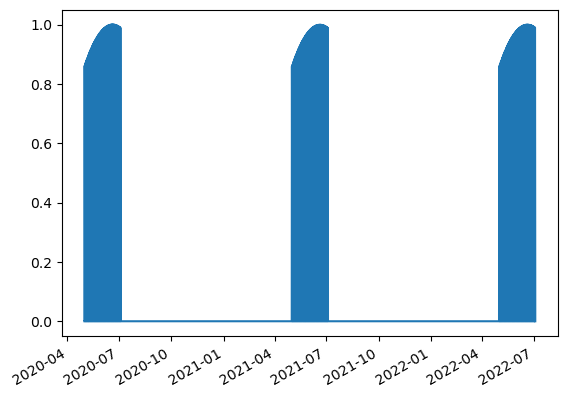

In [63]:
X_train_observed_a_sping.iloc[:,2].plot()

# Comparaison de modèles : 

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from lightgbm import LGBMRegressor

In [339]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror'))
          ]

In [351]:
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_observed_a, train_a_observed.to_numpy().ravel())
    y_pred = regressor.predict(X_train_estimated_a)
    y_test = train_a_estimated.to_numpy().ravel()
    error = mae(y_test, y_pred)
    print('MAE for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

MAE for LR = 229.93334733770325
MAE for Ridge = 229.31080136193287
MAE for Lasso = 230.26264410097875
MAE for ElasticNet = 401.3543886721214
MAE for CART = 179.2152844788348
MAE for RF = 138.79661060537097
MAE for SVR = 344.5106312439275
MAE for GBM = 156.28446653101523
MAE for XGBoost = 147.69079167614132


In [352]:
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_observed_b, train_b_observed.to_numpy().ravel())
    y_pred = regressor.predict(X_train_estimated_b)
    y_test = train_b_estimated.to_numpy().ravel()
    error = mae(y_test, y_pred)
    print('MAE for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

MAE for LR = 36.15925683381103
MAE for Ridge = 36.11830545134325
MAE for Lasso = 32.60962589264529
MAE for ElasticNet = 63.55438518632368
MAE for CART = 32.39045791959071
MAE for RF = 24.801420119163755
MAE for SVR = 50.509720725542614
MAE for GBM = 26.36848604510079
MAE for XGBoost = 27.521634538377416


In [353]:
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_observed_c, train_c_observed.to_numpy().ravel())
    y_pred = regressor.predict(X_train_estimated_c)
    y_test = train_c_estimated.to_numpy().ravel()
    error = mae(y_test, y_pred)
    print('MAE for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

MAE for LR = 28.270636731060247
MAE for Ridge = 28.303585037711596
MAE for Lasso = 25.83009959096092
MAE for ElasticNet = 49.37441080579746
MAE for CART = 25.941235494880548
MAE for RF = 18.646991808873725
MAE for SVR = 41.37438839693488
MAE for GBM = 20.041632887633057
MAE for XGBoost = 19.81347154806818


# Prediction for each station

## Location A

In [72]:
def pos(x):
    if  x < 0:
        return 0
    else:
        return x

In [73]:
X_a = pd.concat([X_train_observed_a, X_train_estimated_a], axis=0)
y_a = pd.concat([train_a_observed, train_a_estimated], axis=0)

In [74]:
X_a = X_a.loc[A_index_spring]
y_a = y_a.loc[A_index_spring]

In [75]:
X_a.shape, y_a.shape

((4608, 57), (4608, 1))

<Axes: >

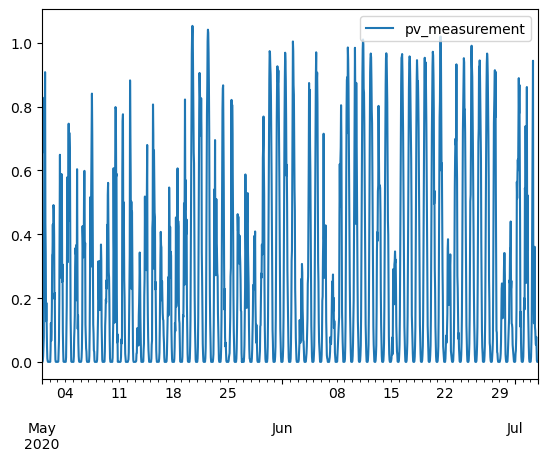

In [76]:
y_a.loc[A_index20].plot()

In [77]:
from xgboost import XGBClassifier

In [78]:
X_a_class = pd.concat([X_train_observed_a, X_train_estimated_a], axis=0)
y_a_class = pd.concat([train_a_observed_binary, train_a_estimated_binary], axis=0)

In [259]:
X_a_class.shape, y_a_class.shape

((34061, 57), (34061, 1))

In [79]:
model_classifier = XGBClassifier(n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_classifier.fit(X_a_class, y_a_class)
y_a_predict = model_classifier.predict(X_test_estimated_a)

In [80]:
df_pred_a = pd.DataFrame({'prediction' : y_a_predict}, index=X_test_estimated_a.index)

predict_indexes_a = df_pred_a[df_pred_a.prediction>.5].index
null_indexes_a = df_pred_a[df_pred_a.prediction<.5].index

<Axes: xlabel='date_forecast'>

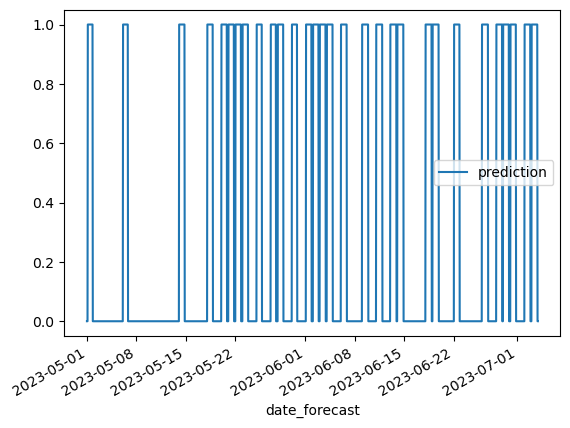

In [81]:
df_pred_a.plot()

In [83]:
from xgboost import XGBRegressor
model_a = XGBRegressor(eval_metric='mae',
                        n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

model_a.fit(X_a.loc[y_a[y_a.pv_measurement>0].index], y_a[y_a.pv_measurement>0])
y_pred_a = model_a.predict(X_test_estimated_a)


for date in predict_indexes_a : 
        df_pred_a.loc[date] = pd.DataFrame({'prediction' : y_pred_a * max_a}, index=X_test_estimated_a.index).loc[date]
    
#We select the indexes with a positive or negative prediction 
#df_pred_a = pd.DataFrame({'prediction' : y_pred_a}, index=X_test_estimated_a.index)
df_pred_a['prediction'] = df_pred_a['prediction'].apply(lambda x: pos(x))

Text(0.5, 1.0, '2022')

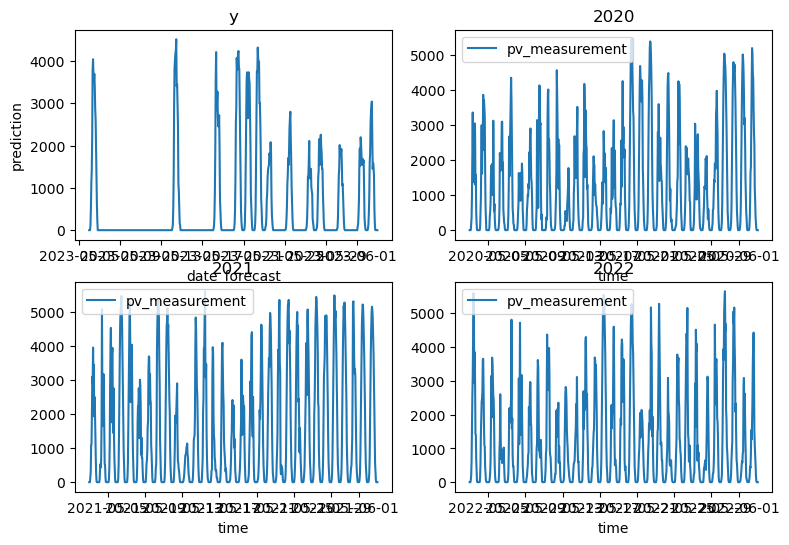

In [84]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
axes = axes.flatten()

sns.lineplot(data=df_pred_a['prediction']['2023-05-03 00:00:00' : '2023-06-03 00:00:00'], ax=axes[0])
axes[0].set_title("y")

sns.lineplot(data=train_a['2020-05-03 00:00:00' : '2020-06-03 00:00:00'], ax=axes[1])
axes[1].set_title("2020")

sns.lineplot(data=train_a['2021-05-03 00:00:00' : '2021-06-03 00:00:00'], ax=axes[2])
axes[2].set_title("2021")

sns.lineplot(data=train_a['2022-05-03 00:00:00' : '2022-06-03 00:00:00'], ax=axes[3])
axes[3].set_title("2022")

<Axes: xlabel='date_forecast'>

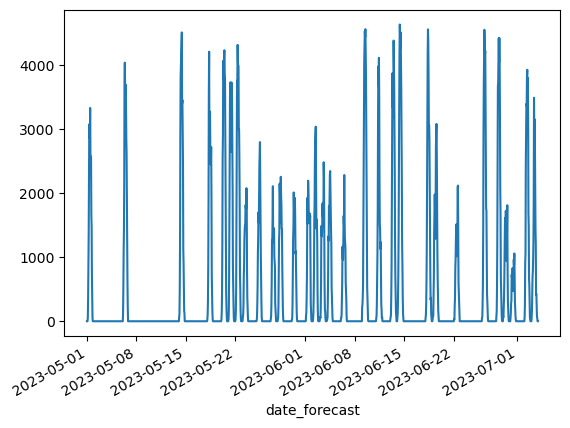

In [86]:
df_pred_a['prediction'].plot()

Text(0.5, 1.0, '2022')

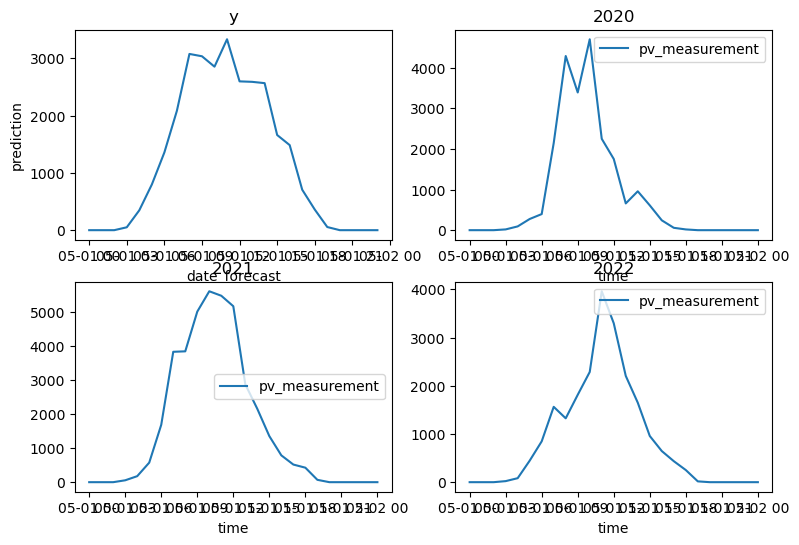

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
axes = axes.flatten()

sns.lineplot(data=df_pred_a['prediction']['2023-05-01 00:00:00' : '2023-05-02 00:00:00'], ax=axes[0])
axes[0].set_title("y")

sns.lineplot(data=train_a['2020-05-01 00:00:00' : '2020-05-02 00:00:00'], ax=axes[1])
axes[1].set_title("2020")

sns.lineplot(data=train_a['2021-05-01 00:00:00' : '2021-05-02 00:00:00'], ax=axes[2])
axes[2].set_title("2021")

sns.lineplot(data=train_a['2022-05-01 00:00:00' : '2022-05-02 00:00:00'], ax=axes[3])
axes[3].set_title("2022")

In [88]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_a['location'] = ['A' for i in df_pred_a.index]
df_pred_a.reset_index(inplace = True)
df_pred_a.reset_index(inplace = True)
df_pred_a.columns = ['id', 'time', 'prediction', 'location']
df_pred_a

id                time  prediction location
0      0 2023-05-01 00:00:00    0.000000        A
1      1 2023-05-01 01:00:00    0.000000        A
2      2 2023-05-01 02:00:00    0.000000        A
3      3 2023-05-01 03:00:00   50.528622        A
4      4 2023-05-01 04:00:00  347.440765        A
..   ...                 ...         ...      ...
715  715 2023-07-03 19:00:00  210.275681        A
716  716 2023-07-03 20:00:00   74.895966        A
717  717 2023-07-03 21:00:00   49.410480        A
718  718 2023-07-03 22:00:00    0.000000        A
719  719 2023-07-03 23:00:00    0.000000        A

[720 rows x 4 columns]

## Location B

In [89]:
X_b = pd.concat([X_train_observed_b, X_train_estimated_b], axis=0)
y_b = pd.concat([train_b_observed, train_b_estimated], axis=0)

In [90]:
X_b.shape, y_b.shape

((32819, 57), (32819, 1))

In [91]:
X_b = X_b.loc[B_index_spring]
y_b = y_b.loc[B_index_spring]

<Axes: >

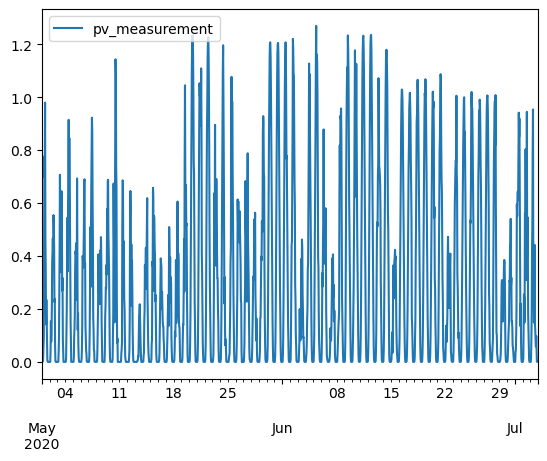

In [93]:
y_b.loc[B_index20].plot()

In [94]:
X_b_class = pd.concat([X_train_observed_b, X_train_estimated_b], axis=0)
y_b_class = pd.concat([train_b_observed_binary, train_b_estimated_binary], axis=0)

In [95]:
X_b_class.shape, y_b_class.shape

((32819, 57), (32819, 1))

In [96]:
model_classifier_b = XGBClassifier(n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_classifier_b.fit(X_b_class, y_b_class)
y_b_predict = model_classifier_b.predict(X_test_estimated_b)

In [97]:
df_pred_b = pd.DataFrame({'prediction' : y_b_predict}, index=X_test_estimated_b.index)

predict_indexes_b = df_pred_b[df_pred_b.prediction>.5].index
null_indexes_b = df_pred_b[df_pred_b.prediction<.5].index

<Axes: xlabel='date_forecast'>

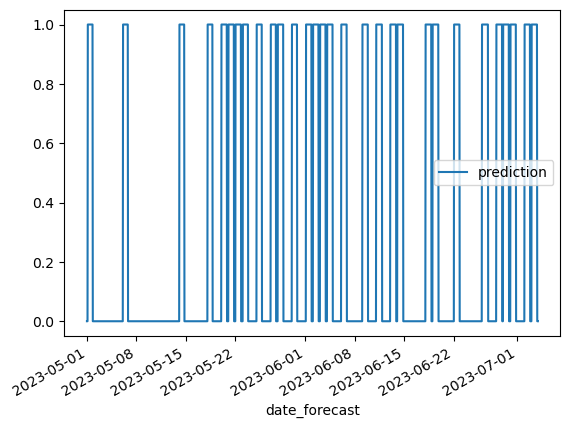

In [98]:
df_pred_b.plot()

In [99]:
from xgboost import XGBRegressor
model_b = XGBRegressor(eval_metric='mae',
                        n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

model_b.fit(X_b.loc[y_b[y_b.pv_measurement>0].index], y_b[y_b.pv_measurement>0])
y_pred_b = model_b.predict(X_test_estimated_b)


for date in predict_indexes_b: 
        df_pred_b.loc[date] = pd.DataFrame({'prediction' : y_pred_b*max_b}, index=X_test_estimated_b.index).loc[date]
    
#We select the indexes with a positive or negative prediction 
#df_pred_a = pd.DataFrame({'prediction' : y_pred_a}, index=X_test_estimated_a.index)
df_pred_b['prediction'] = df_pred_b['prediction'].apply(lambda x: pos(x))

Text(0.5, 1.0, '2021')

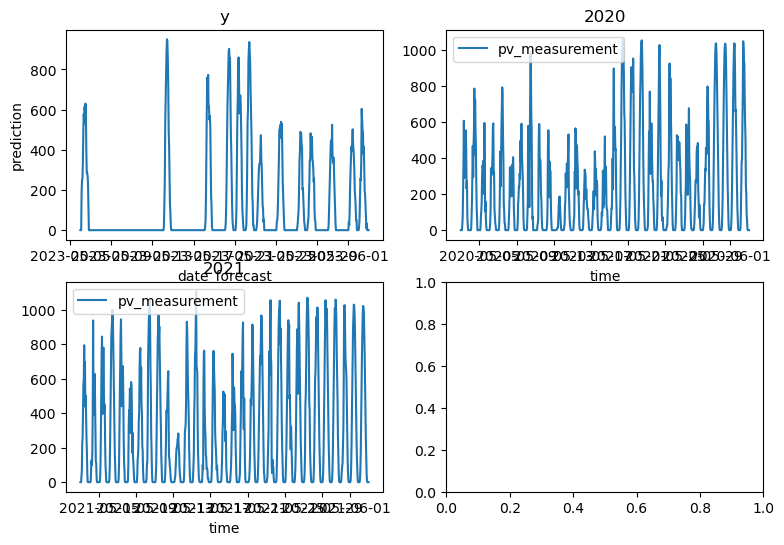

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
axes = axes.flatten()

sns.lineplot(data=df_pred_b['prediction']['2023-05-03 00:00:00' : '2023-06-03 00:00:00'], ax=axes[0],)
axes[0].set_title("y")

sns.lineplot(data=train_b['2020-05-03 00:00:00' : '2020-06-03 00:00:00'], ax=axes[1])
axes[1].set_title("2020")

sns.lineplot(data=train_b['2021-05-03 00:00:00' : '2021-06-03 00:00:00'], ax=axes[2])
axes[2].set_title("2021")


In [101]:
df_pred_b

prediction
date_forecast                  
2023-05-01 00:00:00    0.000000
2023-05-01 01:00:00    0.000000
2023-05-01 02:00:00    0.000000
2023-05-01 03:00:00  106.505859
2023-05-01 04:00:00   82.926254
...                         ...
2023-07-03 19:00:00   58.260578
2023-07-03 20:00:00   28.951097
2023-07-03 21:00:00    0.000000
2023-07-03 22:00:00    0.000000
2023-07-03 23:00:00    0.000000

[720 rows x 1 columns]

<Axes: xlabel='date_forecast'>

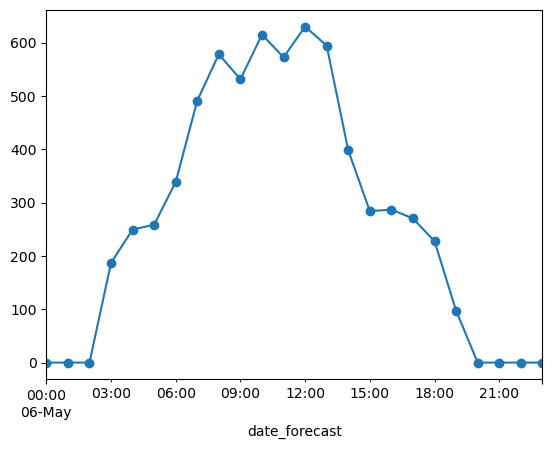

In [102]:
df_pred_b['prediction']['2023-05-06 00:00:00' : '2023-05-10 00:00:00'].plot(marker='o')

<Axes: xlabel='date_forecast'>

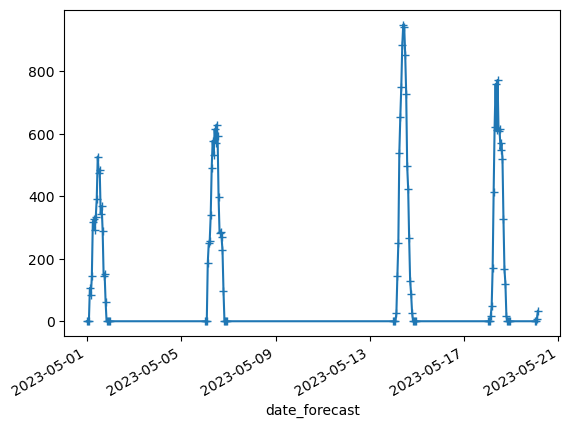

In [103]:
df_pred_b['prediction'][:100].plot(marker='+')

In [104]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_b['location'] = ['B' for i in df_pred_b.index]
df_pred_b.reset_index(inplace = True)
df_pred_b.reset_index(inplace = True)
df_pred_b.columns = ['id', 'time', 'prediction', 'location']
df_pred_b

id                time  prediction location
0      0 2023-05-01 00:00:00    0.000000        B
1      1 2023-05-01 01:00:00    0.000000        B
2      2 2023-05-01 02:00:00    0.000000        B
3      3 2023-05-01 03:00:00  106.505859        B
4      4 2023-05-01 04:00:00   82.926254        B
..   ...                 ...         ...      ...
715  715 2023-07-03 19:00:00   58.260578        B
716  716 2023-07-03 20:00:00   28.951097        B
717  717 2023-07-03 21:00:00    0.000000        B
718  718 2023-07-03 22:00:00    0.000000        B
719  719 2023-07-03 23:00:00    0.000000        B

[720 rows x 4 columns]

<Axes: >

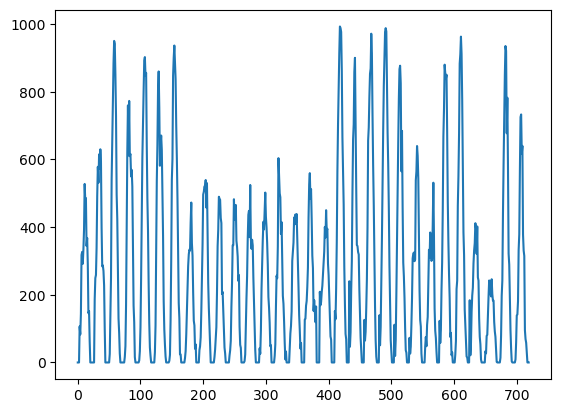

In [105]:
df_pred_b.prediction.plot()

## Location C

In [106]:
X_c = pd.concat([X_train_observed_c, X_train_estimated_c], axis=0)
y_c = pd.concat([train_c_observed, train_c_estimated], axis=0)

In [107]:
X_c.shape, y_c.shape

((26071, 56), (26071, 1))

In [108]:
X_c = X_c.loc[C_index_spring]
y_c = y_c.loc[C_index_spring]

In [110]:
X_c_class = pd.concat([X_train_observed_c, X_train_estimated_c], axis=0)
y_c_class = pd.concat([train_c_observed_binary, train_c_estimated_binary], axis=0)

In [111]:
X_c_class.shape, y_c_class.shape

((26071, 56), (26071, 1))

In [112]:
model_classifier_c = XGBClassifier(n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_classifier_c.fit(X_c_class, y_c_class)
y_c_predict = model_classifier_c.predict(X_test_estimated_c)

In [113]:
df_pred_c = pd.DataFrame({'prediction' : y_c_predict}, index=X_test_estimated_c.index)

predict_indexes_c = df_pred_c[df_pred_c.prediction>.5].index
null_indexes_c = df_pred_c[df_pred_c.prediction<.5].index

<Axes: xlabel='date_forecast'>

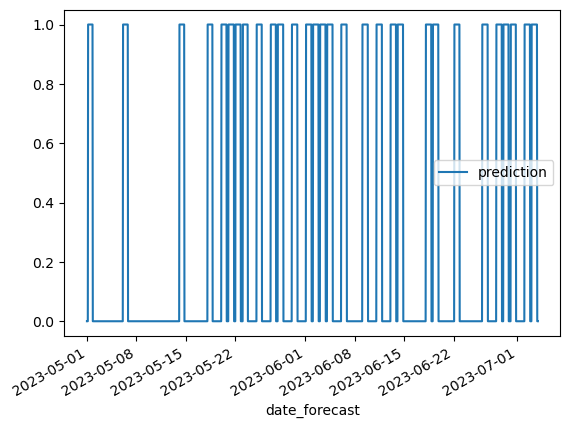

In [114]:
df_pred_c.plot()

In [115]:
model_c = XGBRegressor(eval_metric='mae',
                        n_estimators=2000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

model_c.fit(X_c.loc[y_c[y_c.pv_measurement>0].index], y_c[y_c.pv_measurement>0])
y_pred_c = model_c.predict(X_test_estimated_c)


for date in predict_indexes_c: 
        df_pred_c.loc[date] = pd.DataFrame({'prediction' : y_pred_c * max_c}, index=X_test_estimated_c.index).loc[date]
    
#We select the indexes with a positive or negative prediction 
#df_pred_a = pd.DataFrame({'prediction' : y_pred_a}, index=X_test_estimated_a.index)
df_pred_c['prediction'] = df_pred_c['prediction'].apply(lambda x: pos(x))

Text(0.5, 1.0, '2022')

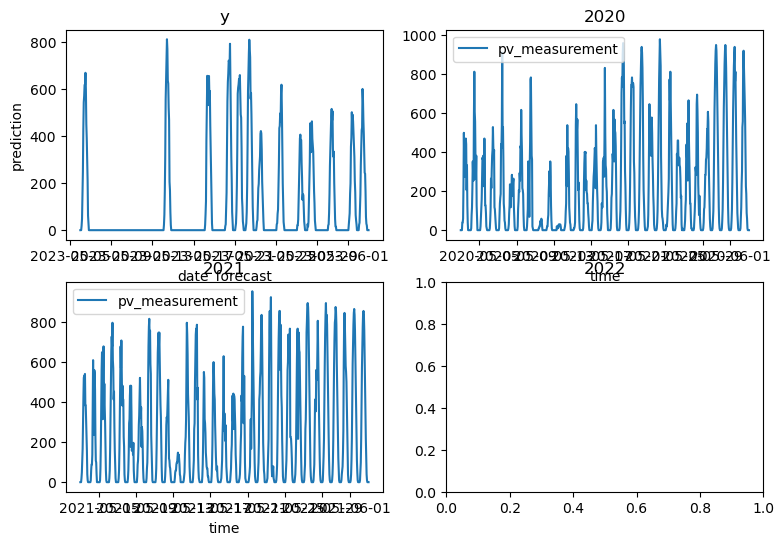

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
axes = axes.flatten()

sns.lineplot(data=df_pred_c['prediction']['2023-05-03 00:00:00' : '2023-06-03 00:00:00'], ax=axes[0])
axes[0].set_title("y")

sns.lineplot(data=train_c['2020-05-03 00:00:00' : '2020-06-03 00:00:00'], ax=axes[1])
axes[1].set_title("2020")

sns.lineplot(data=train_c['2021-05-03 00:00:00' : '2021-06-03 00:00:00'], ax=axes[2])
axes[2].set_title("2021")

sns.lineplot(data=train_c['2022-05-03 00:00:00' : '2022-06-03 00:00:00'], ax=axes[3])
axes[3].set_title("2022")

In [117]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_c['location'] = ['C' for i in df_pred_c.index]
df_pred_c.reset_index(inplace = True)
df_pred_c.reset_index(inplace = True)
df_pred_c.columns = ['id', 'time', 'prediction', 'location']
df_pred_c

id                time  prediction location
0      0 2023-05-01 00:00:00    0.000000        C
1      1 2023-05-01 01:00:00    0.000000        C
2      2 2023-05-01 02:00:00    0.000000        C
3      3 2023-05-01 03:00:00    0.000000        C
4      4 2023-05-01 04:00:00   20.906248        C
..   ...                 ...         ...      ...
715  715 2023-07-03 19:00:00   33.350697        C
716  716 2023-07-03 20:00:00   20.078842        C
717  717 2023-07-03 21:00:00    0.000000        C
718  718 2023-07-03 22:00:00    0.000000        C
719  719 2023-07-03 23:00:00    0.000000        C

[720 rows x 4 columns]

# Gather all the predictions

In [118]:
df_pred_a.head()

id                time  prediction location
0   0 2023-05-01 00:00:00    0.000000        A
1   1 2023-05-01 01:00:00    0.000000        A
2   2 2023-05-01 02:00:00    0.000000        A
3   3 2023-05-01 03:00:00   50.528622        A
4   4 2023-05-01 04:00:00  347.440765        A

In [119]:
df_pred_b.head()

id                time  prediction location
0   0 2023-05-01 00:00:00    0.000000        B
1   1 2023-05-01 01:00:00    0.000000        B
2   2 2023-05-01 02:00:00    0.000000        B
3   3 2023-05-01 03:00:00  106.505859        B
4   4 2023-05-01 04:00:00   82.926254        B

In [120]:
df_pred_c.head()

id                time  prediction location
0   0 2023-05-01 00:00:00    0.000000        C
1   1 2023-05-01 01:00:00    0.000000        C
2   2 2023-05-01 02:00:00    0.000000        C
3   3 2023-05-01 03:00:00    0.000000        C
4   4 2023-05-01 04:00:00   20.906248        C

In [122]:
df_pred_total = pd.concat([df_pred_a, df_pred_b, df_pred_c], axis = 0)
df_pred_final = pd.DataFrame({'id' : [i for i in range(2160)], 'prediction' : df_pred_total['prediction'].to_numpy()})
df_pred_total
#df_pred_final[0:100]

id                time  prediction location
0      0 2023-05-01 00:00:00    0.000000        A
1      1 2023-05-01 01:00:00    0.000000        A
2      2 2023-05-01 02:00:00    0.000000        A
3      3 2023-05-01 03:00:00   50.528622        A
4      4 2023-05-01 04:00:00  347.440765        A
..   ...                 ...         ...      ...
715  715 2023-07-03 19:00:00   33.350697        C
716  716 2023-07-03 20:00:00   20.078842        C
717  717 2023-07-03 21:00:00    0.000000        C
718  718 2023-07-03 22:00:00    0.000000        C
719  719 2023-07-03 23:00:00    0.000000        C

[2160 rows x 4 columns]

In [123]:
df_pred_final.to_csv('submission_18.csv', index=False)